# Car Dataset Eploratory Data Analysis and Basic Prediction Models
John Belcher-Heath 

# Introduction

The task is to predict the price of a car from a subset of attributes from the [US used cars data set](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset) on Kaggle.

I will complete the task following the ML checklist in the book, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. which is:

1. Frame the problem
2. Get the data
3. Explore the data
4. Prepare the data
5. Explore models
6. Fine-tune models
7. Present solution
8. Launch/maintain

However, for the scope of this project **8.** will only be partially completed by deploying it on the dataset but not maintaining. **7.** will be presented in an external pdf report.

# 1. Frame the problem

We want to predict the price of a car (continuos) using a small selection of attributes available to us. This makes the problem a regression problem.

Since this is a regression problem the common performance measure of Root Mean Square Error (referred to as RMSE from now on) will be used:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n(y_i - \hat{y}_i)^2}
$$

where:

- $y_i$ - ith response from the data 
- $\hat{y_i}$ - ith predicted response using the model 
- n - number of responses/number of predicted responses

For this measure we are looking for low RMSE. This will mean small residuals and the model is a good fit for the data.

# 2. Get the data

In this section a random selection of entries from one of the large datasets will be obtained and read into a pandas.DataFrame object to explore. A random selection of the large data set will be explored, since all we are doing is getting to know the data. Having a large amount of data to explore will be time consuming, but having too small (and non random sample) will mean our observations may not be valid. Taking a random sample of a large dataset should give a relatively good representation of the overall dataset, whilst minimising the amount of data requiring to be manipulated.

In [1]:
# Import required libraries
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn | grep -v 'already satisfied'

# Import libraries
import pandas as pd
import numpy as np
import sklearn
#import os
from pathlib import Path
import math

Let's read the test data in

In [131]:
file_path: str = "/cs/studres/ID5059/Coursework/Coursework-1/data/3_large/used_cars_data_large_0.csv" # uni path

original_df: pd.DataFrame = pd.read_csv(file_path) # Select the first large file in the folder

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)

# check data looks roughly okay
original_df.head(5)

/tmp/ipykernel_18323/4258018378.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df: pd.DataFrame = pd.read_csv(file_path) # Select the first large file in the folder


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


Looks like everything has imported correctly. Time to explore the data

# 3. Explore the data

The data will now be inspected to explore what attributes are available to using the info output. 

Attributes with large proportion of NAs can start to be identified as well.

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295502 entries, 0 to 295501
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      295502 non-null  object 
 1   back_legroom             281082 non-null  object 
 2   bed                      1850 non-null    object 
 3   bed_height               33799 non-null   object 
 4   bed_length               33799 non-null   object 
 5   body_type                294317 non-null  object 
 6   cabin                    5630 non-null    object 
 7   city                     295502 non-null  object 
 8   city_fuel_economy        246749 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             295502 non-null  int64  
 11  dealer_zip               295502 non-null  object 
 12  description              285686 non-null  object 
 13  engine_cylinders         286555 non-null  object 
 14  engi

In [4]:
# Explore attributes values
original_df.head(5) 

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


Initial observations from head:

- A lot of measurements contain the units, making them non-numerical
- A few columns seem to represent the same information
- Some attributes appear to have lots of NaNs
- Multiple ID attributes which can all be dropped
- `major_options` is a list which will need parsing somehow
- `power` contains all the info of `horsepower`
- Lots of irrelevant metadata to drop. E.g. `description`

For all attributes the units can be either seen in the data frame or read from the
Kaggle dataset page. The main one to concern ourself with is that the price appears to be $, this isn't included in the description, but can be assumed since it is US cars.

Let's split the data and assign the labels. Since we are interested in `price`, we'll use this to split the data so that both the training set and test set will have a similar portion priced cars.

Let's take a look at `price` in more detail.

<Axes: >

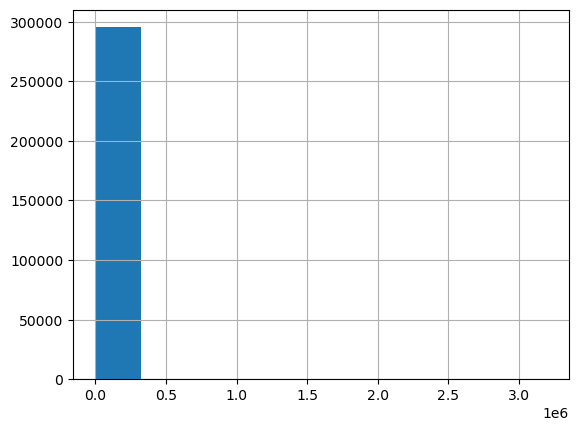

In [5]:
original_df['price'].hist()

Clearly this is very sparse towards the higher end, so let's have most of the bins for our cut at the lower end.

The bins I have chosen can be seen below, I've attempted to capture the different price categories of car. So the upto \\$10,000 would correspond to low-end used cars, then \\$20,000 more expensive used and new. Then continuing this sort of idea til \\$50,000 then everything after is likely high-end luxury.

In [133]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up the split object
shuffled_data = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=314)

# Create some differnt price bins to split the data by price
original_df['price_category'] = pd.cut(
    original_df['price'],
    bins=[0, 10000, 20000, 30000, 50000, np.inf],
    labels=[1,2,3,4,5]
)

Let's check this split out

<Axes: >

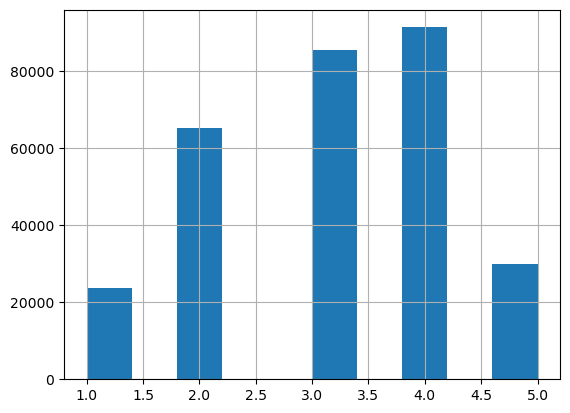

In [7]:
original_df['price_category'].hist()

This looks good, the bins looks 'full enough'

Let's do the split.

In [134]:
[(train_set_index, test_set_index )] = shuffled_data.split(original_df, original_df['price_category'])
# Take the labels from the data
prices = original_df.price.copy()
original_df.drop(columns='price', inplace=True)
stratified_train_set = original_df.loc[train_set_index]
stratified_test_set = original_df.loc[test_set_index]

# Remove the old dataframe as no longer needed
del(original_df)

Let's see if the split looks okay

In [9]:
stratified_test_set['price_category'].value_counts() / len(stratified_test_set)

4    0.309098
3    0.289471
2    0.220470
5    0.101217
1    0.079745
Name: price_category, dtype: float64

In [10]:
stratified_train_set['price_category'].value_counts() / len(stratified_train_set)

4    0.309102
3    0.289474
2    0.220477
5    0.101205
1    0.079742
Name: price_category, dtype: float64

All is good, let's continue with the exploration.

In [11]:
stratified_test_set.drop(columns='price_category', inplace=True)
stratified_train_set.drop(columns='price_category', inplace=True)
df = stratified_train_set.copy()
sample_size : int = len(df)

### Start to inspect
Firstly, let's drop all attributes from above which have less than 50% non-null values, since including these may negatively effect our model if a majority of entries do not have this attribute. Using them in our model will mean the model is not very general.

In [12]:
# Drop all attributes with less than 50% non-null values
df = df.drop(columns=df.keys()[df.count() / sample_size < 0.5])

### Data types correction
Some of the attributes appear to have been imported with different datatype, for example `zip code` as `object` not `int64`. This will be due to some integer attributes containing `NaNs`, and since the system has no interpretation for `NaNs` in `integer` types, they are taken as `object` data types instead. 

To further inspect this, all `object` data types are shown below.

In [13]:
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236401 entries, 240581 to 8555
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   vin                   236401 non-null  object
 1   back_legroom          224924 non-null  object
 2   body_type             235463 non-null  object
 3   city                  236401 non-null  object
 4   dealer_zip            236401 non-null  object
 5   description           228540 non-null  object
 6   engine_cylinders      229281 non-null  object
 7   engine_type           229281 non-null  object
 8   exterior_color        236400 non-null  object
 9   fleet                 130572 non-null  object
 10  frame_damaged         130572 non-null  object
 11  franchise_make        186526 non-null  object
 12  front_legroom         224924 non-null  object
 13  fuel_tank_volume      224924 non-null  object
 14  fuel_type             230583 non-null  object
 15  has_accidents 

From manual inspection there are some attributes that need further inspection to check they have been given the correct type. The first 5 entries are shown below to help.

In [14]:
df.select_dtypes(include=object).head(5)

,vin,back_legroom,body_type,city,dealer_zip,description,engine_cylinders,engine_type,exterior_color,fleet,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,interior_color,isCab,length,listed_date,listing_color,main_picture_url,major_options,make_name,maximum_seating,model_name,power,salvage,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width
240581,WA1G2AFY8L2053706,37.8 in,SUV / Crossover,Brookline,2445,BUY WITH CONFIDENCE The Herb Chambers Companie...,I4,I4,White,NaN,NaN,Audi,41 in,15.3 gal,Gasoline,NaN,65.3 in,Nougat Brown / Black,NaN,184.4 in,2020-02-23,WHITE,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Navigation System', 'Conven...",Audi,5 seats,Q5 Hybrid Plug-in,NaN,NaN,Audi Brookline,NaN,NaN,A,7-Speed Automatic Overdrive,t88976,3.0T Premium e quattro AWD,AWD,All-Wheel Drive,111 in,84.3 in
24368,1GNEVKKW9LJ295013,38.4 in,SUV / Crossover,Huntington,11743,*This 2020 Chevrolet Traverse Premier is offer...,V6,V6,Black,NaN,NaN,Chevrolet,41 in,21.7 gal,Gasoline,NaN,70.7 in,Black (Jet Blk Perf Lth St Trm),NaN,204.3 in,2020-08-22,BLACK,https://cdn.inventoryrsc.com/103196493_5f5880c...,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Chevrolet,7 seats,Traverse,"310 hp @ 6,800 RPM",NaN,Empire Chevrolet of Huntington,NaN,"266 lb-ft @ 2,800 RPM",A,9-Speed Automatic,t85759,Premier AWD,4WD,Four-Wheel Drive,120.9 in,78.6 in
222132,W1N0G8EB1LF760226,37.3 in,SUV / Crossover,Scarborough,4074,"Active Courtesy Vehicle #N - MSRP: $47,310 - D...",I4,I4,Graphite Gray Metallic,False,False,Mercedes-Benz,40.8 in,17.4 gal,Gasoline,False,65.5 in,Black MB-Tex,False,183.8 in,2019-12-13,GRAY,https://static.cargurus.com/images/forsale/202...,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Mercedes-Benz,5 seats,GLC-Class,"255 hp @ 5,800 RPM",False,Prime Motor Cars,False,"273 lb-ft @ 1,800 RPM",A,9-Speed Automatic,t86950,GLC 300 4MATIC AWD,AWD,All-Wheel Drive,113.1 in,82.5 in
17013,1G1ZD5ST5JF272096,38.1 in,Sedan,Ann Arbor,48104,Vehicle is located at 3500 Jackson Rd Ann Arbo...,I4,I4,Summit White,True,False,Honda,42 in,15.8 gal,Gasoline,False,57.6 in,jet black,True,193.8 in,2020-08-27,WHITE,https://d28oohqmlmgnr6.cloudfront.net/c8/54/a8...,"['Alloy Wheels', 'Backup Camera', 'Android Aut...",Chevrolet,5 seats,Malibu,"160 hp @ 5,700 RPM",False,Germain Honda of Ann Arbor,False,"184 lb-ft @ 2,500 RPM",A,6-Speed Automatic,t74365,LT FWD,FWD,Front-Wheel Drive,111.4 in,73 in
189645,1FTER4FH6LLA53949,34.5 in,Pickup Truck,Plainville,6062,"Bristol, Plainville, Hartford, Southington, Wa...",I4,I4,Shadow Black,NaN,NaN,Ford,43.1 in,18 gal,Gasoline,NaN,71.8 in,Black (Ebony),NaN,210.8 in,2020-07-23,BLACK,https://static.cargurus.com/images/forsale/202...,"['Backup Camera', 'Remote Start']",Ford,5 seats,Ranger,NaN,NaN,Gengras Ford Lincoln,NaN,NaN,A,Automatic,t88842,Lariat SuperCrew 4WD,4WD,Four-Wheel Drive,126.8 in,85.8 in


The only attribute that can be directly converted to an integer is the `dealer_zip`, this is unlikely to provide any additional information that the `lattitude` and `longitutde` will not already give so no need to convert.This is dropped from our dataset below. 

This inspection has shown that a lot of the measurements have had units included, so these attributes will need to be converted to numerical.

In [15]:
# Drop dealer_zip
df = df.drop(columns='dealer_zip')

In [16]:
def convert_measurement(s: str) -> float:
    """
    Converts the measuremnt with units to a numerical value
    :param s: string measurement
    :type s: str
    :return: the actual numerical value
    """
    if type(s) == str:
        s_split: list = s.split(" ")
        try:
            return float(s_split[0])
        
        # If cannot convert to dtype, ie NA then return NA
        except ValueError:
            return float('NaN')
        
    # If already converted to correct format, ie if function accidently run twice
    else:
        return s

cols_to_convert : list = ["back_legroom", "front_legroom", "fuel_tank_volume", "height", "length", 
                         "maximum_seating", "wheelbase", "width"]

In [17]:
# Apply the function to get numerical data from the string measurements
df[cols_to_convert] = df[cols_to_convert].applymap(convert_measurement)
df[cols_to_convert] = df[cols_to_convert].astype(np.float64)

It is important to note that the attributes `power` and `torque` contain numerical data, but they cannot be simply convert at this point, instead will be explored later.

Next, let's drop all the irrelevant meta data and other labels which won't be helpful with our model and will instead just increase the complexity which could lead to overfitting. For example the `description`, `interior color`, `exterior color`, `vin` etc.

In [18]:
# Drop irrelevant columns
df.drop(columns=['description', 'interior_color', 'exterior_color', 
                      'main_picture_url', 'model_name', 'sp_name', 'transmission_display',
                      'trim_name', 'trimId', 'vin', 'sp_id', 'listing_id'], inplace=True)

### Fixing duplicates part 1

It is easy to see that `engine_cylinders` and `engine_type` appear to be duplicate. Similarly so do `wheel_system` and `wheel_system_display`, as well as `make_name` and `franchise_make`.

Before dropping one of each of these, the data will be further inspected to make sure that there's no discrepancy between the two in the wider data set (i.e. not just in the head).

In [19]:
df_engine = df[['engine_cylinders', 'engine_type']]
df_engine[np.logical_xor(df_engine.engine_cylinders.isna(), df_engine.engine_type.isna())].count()

engine_cylinders    0
engine_type         0
dtype: int64

So above tells us that all entries with attributes are identical in being either NA or not, so dropping one of these attributes means no information is lost.

In [20]:
# Delete the temp dataframe
del(df_engine)
# Drop repeat
df = df.drop(columns='engine_cylinders')

For the `wheel_system` and `wheel_system_display`:

In [21]:
df_wheel = df[['wheel_system', 'wheel_system_display']]
df_wheel[np.logical_xor(df_wheel.wheel_system.isna(), df_wheel.wheel_system_display.isna())].count()

wheel_system            0
wheel_system_display    0
dtype: int64

The above implies that both attributes provide the same information for the cars. Hence deciding which to drop is irrelevant. I will choose to drop the `wheel_system_display` since wheel system has a nice short appriviation.

In [22]:
# Delete the temp dataframe
del(df_wheel)
# Drop repeated column
df = df.drop(columns='wheel_system_display')

Finally for make.

In [23]:
df_make = df[['make_name', 'franchise_make']]
df_make[np.logical_xor(df_make.make_name.isna(), df_make.franchise_make.isna())].count()

make_name         49875
franchise_make        0
dtype: int64

From this we can see that the `make_name` has more information than the `franchise_make`, hence the `franchise_make` is dropped.

In [24]:
# Delete the temp dataframe
del(df_make)
# Drop repeated column
df = df.drop(columns='franchise_make')

### Fixing duplicates part 2

For part 2, these duplicates data may need to be extracted then compared, before just dropping attributes.

Let's inspect the engine data:

In [25]:
engine_data = df[['power', 'horsepower']]
engine_data[np.logical_xor(engine_data.power.isna(), engine_data.horsepower.isna())].count()

power             0
horsepower    22711
dtype: int64

So, luckily `horsepower` which is already numerical gives more info than power, so power can be dropped.

*\*Note: For a more complicated model, RPM could be extracted from power and then missing imputed. However,
since there is around 15% missing (see below) for this and it could have a damaging effect imputing, so it has not been included.*

In [26]:
# Non-null power
df.power.count() / sample_size

0.8519972419744417

In [27]:
df = df.drop('power', axis=1)

In [28]:
# Horsepower non-null
df.horsepower.count() / sample_size

0.9480670555539105

So from above we can see that only around 5% have no `horsepower` attribute. For these remaining entries we will consider how many have engine size attributes.

In [29]:
len(df[(df['horsepower'].isna() & df['engine_type'].isna())]) / sample_size

0.021294326166132967

Now there is only a small amount of cars with neither `horsepower` or `engine_type` attribute. 

So, the `horsepower` for all cars will be assigned using the following:

- if the car has `horspower` asigned pass
- elif the car has `engine_type` assign median for that type
- else assign the overall median for `horsepower`

Let's do it:

In [30]:
df[['horsepower']] = df[['horsepower', 'engine_type']].groupby('engine_type').transform(lambda x: x.fillna(x.median()))

**Note: this is an imputation step so we don't want to use horsepower as a way to fill other NaNs as this could lead to too much creation of data and introduce bias**

Let's examine the improvements

In [31]:
# non-null horsepower after improvement
df.horsepower.count() / sample_size

0.9698732238865317

Now for the final step of assigning the last na just the average of all the horsepowers:

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['horsepower']])

df[['horsepower']] = imputer.transform(df[['horsepower']])

Let's see the results

(1.0, <Axes: >)

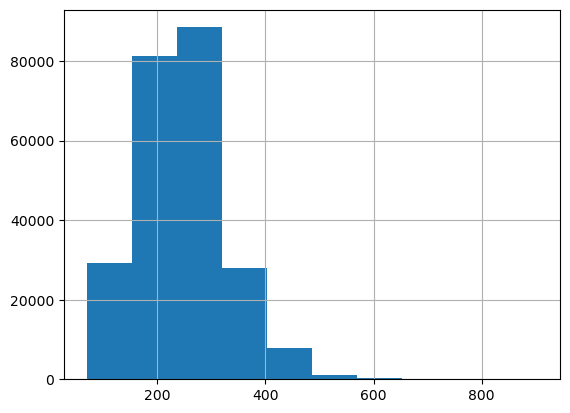

In [33]:
df.horsepower.count() / sample_size, df.horsepower.hist()

Everything looks all good!

Later on this process will be turned into a proper custom transformer to interact with SciKit library.

In [34]:
# Delete the temp dataframe
del(engine_data)

### Object type attributes
Now we have removed some of the duplicates and corrected some of the data type issues, the `object` type attributes will be properly explored now.

In [35]:
df.select_dtypes(include=object).head(5)

,body_type,city,engine_type,fleet,frame_damaged,fuel_type,has_accidents,isCab,listed_date,listing_color,major_options,make_name,salvage,theft_title,torque,transmission,wheel_system
240581,SUV / Crossover,Brookline,I4,NaN,NaN,Gasoline,NaN,NaN,2020-02-23,WHITE,"['Leather Seats', 'Navigation System', 'Conven...",Audi,NaN,NaN,NaN,A,AWD
24368,SUV / Crossover,Huntington,V6,NaN,NaN,Gasoline,NaN,NaN,2020-08-22,BLACK,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Chevrolet,NaN,NaN,"266 lb-ft @ 2,800 RPM",A,4WD
222132,SUV / Crossover,Scarborough,I4,False,False,Gasoline,False,False,2019-12-13,GRAY,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Mercedes-Benz,False,False,"273 lb-ft @ 1,800 RPM",A,AWD
17013,Sedan,Ann Arbor,I4,True,False,Gasoline,False,True,2020-08-27,WHITE,"['Alloy Wheels', 'Backup Camera', 'Android Aut...",Chevrolet,False,False,"184 lb-ft @ 2,500 RPM",A,FWD
189645,Pickup Truck,Plainville,I4,NaN,NaN,Gasoline,NaN,NaN,2020-07-23,BLACK,"['Backup Camera', 'Remote Start']",Ford,NaN,NaN,NaN,A,4WD


First let's see if any of the attributes have any blaring issues with NAs.

In [36]:
df.select_dtypes(include=object).count() / sample_size

body_type        0.996032
city             1.000000
engine_type      0.969882
fleet            0.552333
frame_damaged    0.552333
fuel_type        0.975389
has_accidents    0.552333
isCab            0.552333
listed_date      1.000000
listing_color    1.000000
major_options    0.924112
make_name        1.000000
salvage          0.552333
theft_title      0.552333
torque           0.840906
transmission     0.986172
wheel_system     0.955343
dtype: float64

Clerly some of the attributes are not suitable to use since they have a low number of entries. Any object attributes with less than 80% entries are now removed.

In [37]:
df.drop(columns=df.select_dtypes(include=object).loc[:, df.select_dtypes(include=object).count() / sample_size < 0.8].keys(), inplace=True)

This leaves:

In [38]:
df.select_dtypes(include=object).head(5)

,body_type,city,engine_type,fuel_type,listed_date,listing_color,major_options,make_name,torque,transmission,wheel_system
240581,SUV / Crossover,Brookline,I4,Gasoline,2020-02-23,WHITE,"['Leather Seats', 'Navigation System', 'Conven...",Audi,NaN,A,AWD
24368,SUV / Crossover,Huntington,V6,Gasoline,2020-08-22,BLACK,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Chevrolet,"266 lb-ft @ 2,800 RPM",A,4WD
222132,SUV / Crossover,Scarborough,I4,Gasoline,2019-12-13,GRAY,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Mercedes-Benz,"273 lb-ft @ 1,800 RPM",A,AWD
17013,Sedan,Ann Arbor,I4,Gasoline,2020-08-27,WHITE,"['Alloy Wheels', 'Backup Camera', 'Android Aut...",Chevrolet,"184 lb-ft @ 2,500 RPM",A,FWD
189645,Pickup Truck,Plainville,I4,Gasoline,2020-07-23,BLACK,"['Backup Camera', 'Remote Start']",Ford,NaN,A,4WD


Since we have `daysonmarket` attribute the `listed_date` can be dropped. Additionally, `city` can assumed to have minimal effect since most cities can be assumed to have a diverse range of individuals with varying wealth and cars. So, the price distribution will be the same across all cities.

In [39]:
df.drop(columns=['city', 'listed_date'], inplace=True)

`torque` could be useful but there is too few entries (see below) for it and it is not recorded elsewhere (like `horsepower` recorded in `power` and `engine_size`). Hence I will not use this attribute for my model

In [40]:
df.torque.count() / sample_size

0.8409059183336788

In [41]:
df.drop(columns='torque', inplace=True)

For major options, since there is so much variabilty from visual inspection of naming of products, the number of major of features will be used instead. The actual usefulness of this will be explored later. Again transformation will be formalised later.

In [42]:
df.major_options = df.major_options.apply(lambda x: len(x.split(",")) if type(x) == str else "NaN").astype(np.float64)

For the remaining attributes, these will be used as categorical attributes in the model.

In [43]:
chosen_categorical_attributes : list = df.select_dtypes(include=object).keys().to_list()

### Explore the bool values
Next let's explore the boolean attributes available

In [44]:
df.select_dtypes(include=bool).head(5)

,franchise_dealer,is_new
240581,True,True
24368,True,True
222132,True,False
17013,True,False
189645,True,True


Both these could be useful, let's see if there's any issues with NaNs

In [45]:
df.select_dtypes(include=bool).count() / sample_size

franchise_dealer    1.0
is_new              1.0
dtype: float64

Fantastic! Both these attriubtes have no NaNs so can be used straight away.

In [46]:
chosen_boolean_attributes : list = ['franchise_dealer', 'is_new']

### Exploring the numerical attributes

Now the qualitative and boolean attributes have been dealt with it's time for the quatitative attributes.

In [47]:
# Quick inspection to see which numerical are available
df.select_dtypes(include=[np.int64, np.float64])

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,major_options,maximum_seating,mileage,owner_count,savings_amount,seller_rating,wheelbase,width,year
240581,37.8,NaN,199,2000.0,41.0,15.3,65.3,NaN,362.0,42.3300,184.4,-71.1248,3.0,5.0,27.0,NaN,0,3.714286,111.0,84.3,2020
24368,38.4,17.0,18,3600.0,41.0,21.7,70.7,25.0,310.0,40.8351,204.3,-73.3691,11.0,7.0,0.0,NaN,0,4.000000,120.9,78.6,2020
222132,37.3,NaN,271,2000.0,40.8,17.4,65.5,NaN,255.0,43.5993,183.8,-70.3217,5.0,5.0,2660.0,NaN,4331,4.571429,113.1,82.5,2020
17013,38.1,27.0,13,1500.0,42.0,15.8,57.6,36.0,160.0,42.2487,193.8,-83.7394,4.0,5.0,47646.0,2.0,122,3.400000,111.4,73.0,2018
189645,34.5,20.0,48,2300.0,43.1,18.0,71.8,24.0,270.0,41.6770,210.8,-72.8423,2.0,5.0,13.0,NaN,0,4.333333,126.8,85.8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252044,39.5,16.0,60,3500.0,42.9,18.6,71.0,23.0,290.0,41.6291,198.3,-86.2466,11.0,7.0,39708.0,1.0,2124,4.266667,112.8,90.2,2017
142919,36.5,70.0,112,2000.0,41.4,12.1,58.4,75.0,248.0,36.6143,194.6,-121.8440,10.0,5.0,41529.0,1.0,3502,4.117647,117.1,83.7,2018
170743,38.3,22.0,3,2400.0,41.8,13.5,64.8,30.0,180.0,42.6810,173.0,-74.4390,13.0,5.0,11.0,NaN,0,5.000000,103.8,80.0,2020
187394,NaN,NaN,10,6600.0,44.5,36.0,79.9,NaN,445.0,41.5319,235.5,-73.5854,8.0,3.0,14.0,NaN,0,4.333333,141.6,81.8,2020


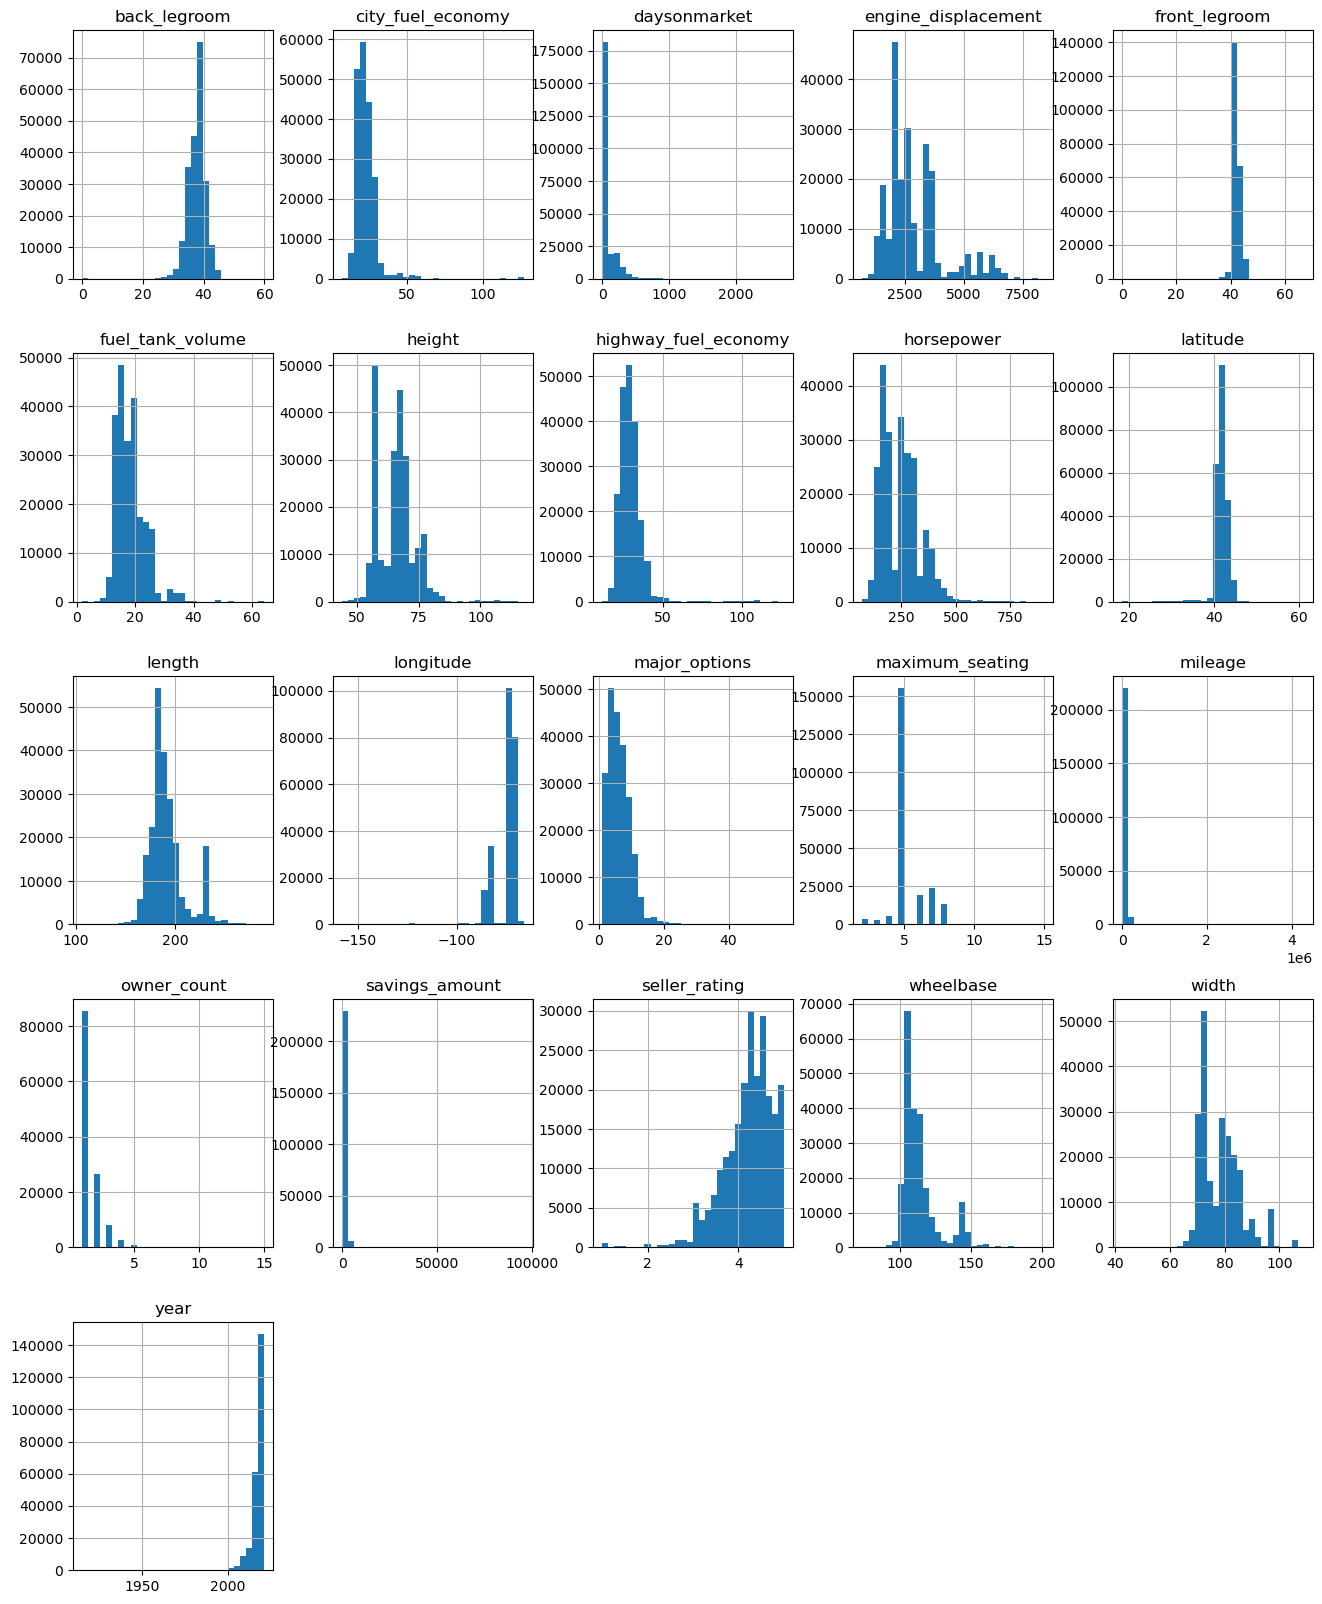

In [48]:
import matplotlib.pyplot as mpl
%matplotlib inline

df.select_dtypes(include=[np.int64, np.float64]).hist(figsize=(16,20), bins=30)
mpl.show()

Observations:
- Both Fuel economy attributes appear to be normally distributed with a slight skew
- Majority of cars do not stay on the market for a long duration, mostly less than a couple of months. Some may be above a large amount so these may need to be removed to not skew data.
- `engine_displacement` doesn't appear to have any obvious standard distribution
- `horsepower` appears to have a normal distribution around 200hp with a standard deviation of around 50hp
- `lattitude` & `longitude` appears to show that this dataset corresponds to the east coast. But as mentioned, geography should make too much of an effect the price of a car.
- `mileage` of most cars is grouped mostly towards the lower end and fewer cars with higher mileage, as would be expected
- `owner_count` has a modal of 1, again as to be expected
- `seller_rating` appears to be skewed negatively towards the higher end
- Majority of cars are from the last 15 years
- Modal `maximum_seating` is 5

It is clear as well that some of the bins are very sparse so will need coarser bins with labels for our model later to make sure our training set and test set have similar distributions.

In [49]:
df.select_dtypes(include=[np.float64, np.int64]).count() / sample_size

back_legroom            0.917386
city_fuel_economy       0.835474
daysonmarket            1.000000
engine_displacement     0.948067
front_legroom           0.945098
fuel_tank_volume        0.950855
height                  0.951299
highway_fuel_economy    0.835474
horsepower              1.000000
latitude                1.000000
length                  0.951299
longitude               1.000000
major_options           0.924112
maximum_seating         0.951290
mileage                 0.959679
owner_count             0.523780
savings_amount          1.000000
seller_rating           0.986679
wheelbase               0.951299
width                   0.951290
year                    1.000000
dtype: float64

Firstly it is clear to see there is no issue with NAs in the attributes: `daysonmarket`, `lattitude`, `longitude`, `savings_amount` and `year` (as well as `horsepower` after the fix above). Using contextual knowledge all of these afformentioned attributes will likely be useful in predicting the `price` attribute so will be used. 

Looking at the list of other attributes available with a low number of non-nulls. The additional attributes I believe may effect the `price` and want to explore more are:

- `city_fuel_economy` and `highway_fuel_economy` - useful metric of car performance, more powerful and expensive cars likely to have lower fuel efficiency
- `fuel_tank_volume` - bigger more expensive cars likely to have a large fuel tank, hence useful metric
- `engine_displacement` and `horsepower` (and `power` which will be used to get na values) - all similar/the same metrics for how powerful a car is
- `major_options` - more expensive cars tend to have more options
- `mileage` - more miles done the less it is valued generally
- `seller_rating` - If a seller has a better rating people may pay more than if they were to go to a seller with a poor rating.
- `length` and `width` - A measure of the size of the car. Large cars tend to be more expensive. E.g. sports cars are very wide generally.

I have chosen not to include `owner_count` since there are too few entries for this attribute. Additonally `maximum_seating` is also excluded, although small number of non-nulls, this is since cars seating will have little effect on price. Think two seat sports cars and a smart car, or a 5 seat corsa and a 5 seat golf.

### Attribute transformation
From the graphs above some attributes we have chosen to explore further need transforming so when data is scaled later they are no drastically long tails to the data. To do this the function below will be used.

**The function will be demonstrated but not applied to the data yet since there are NAs that need filling**

In [50]:
def transform_bins(pds: pd.Series, bins, min_val = None, max_val = None) -> pd.Series:
    """
    Function to transform a continuous series with sparse data to a categorical attribute with full bins.
    The absolute max is always 0 and inf to make sure all data is captured.
    :param pds: original cts data
    :param bins: number of bins in resultant series (note this is how many will be attempted to be created)
    :min_val: starting value for main section of the bins
    :max_val: ending value for main section of the bins
    :return: transformed series
    """
    bins -=1
    if min_val is not None and max_val is not None: 
        cuts: list = np.append(np.linspace(min_val, max_val, bins), np.array([np.inf])).tolist()
        cuts.insert(0,0)
    else:
        cuts: list = np.append(np.linspace(pds.quantile(0.025), pds.quantile(0.975), bins), np.array([np.inf])).tolist()
        cuts.insert(0, 0)
        
    # Drop any duplicates, ie if 0 included twice
    cuts = list(dict.fromkeys(cuts))
    labels: list = [str(i) for i in range(len(cuts)-1)]
        
    # include_lowest needed to make sure if values are 0 they're still given a label
    return pd.cut(pds, bins=cuts, labels=labels, include_lowest=True).astype(np.float64)

The attributes needing to be transformed are:

In [51]:
transform_attributes: list = ["city_fuel_economy", "highway_fuel_economy","daysonmarket", "fuel_tank_volume", 
                              "mileage", "savings_amount", "year", "major_options"]

The function will be applied in a uniform way with 30 bins for each first, these will then be inspected to see if more detailed transformation may be required

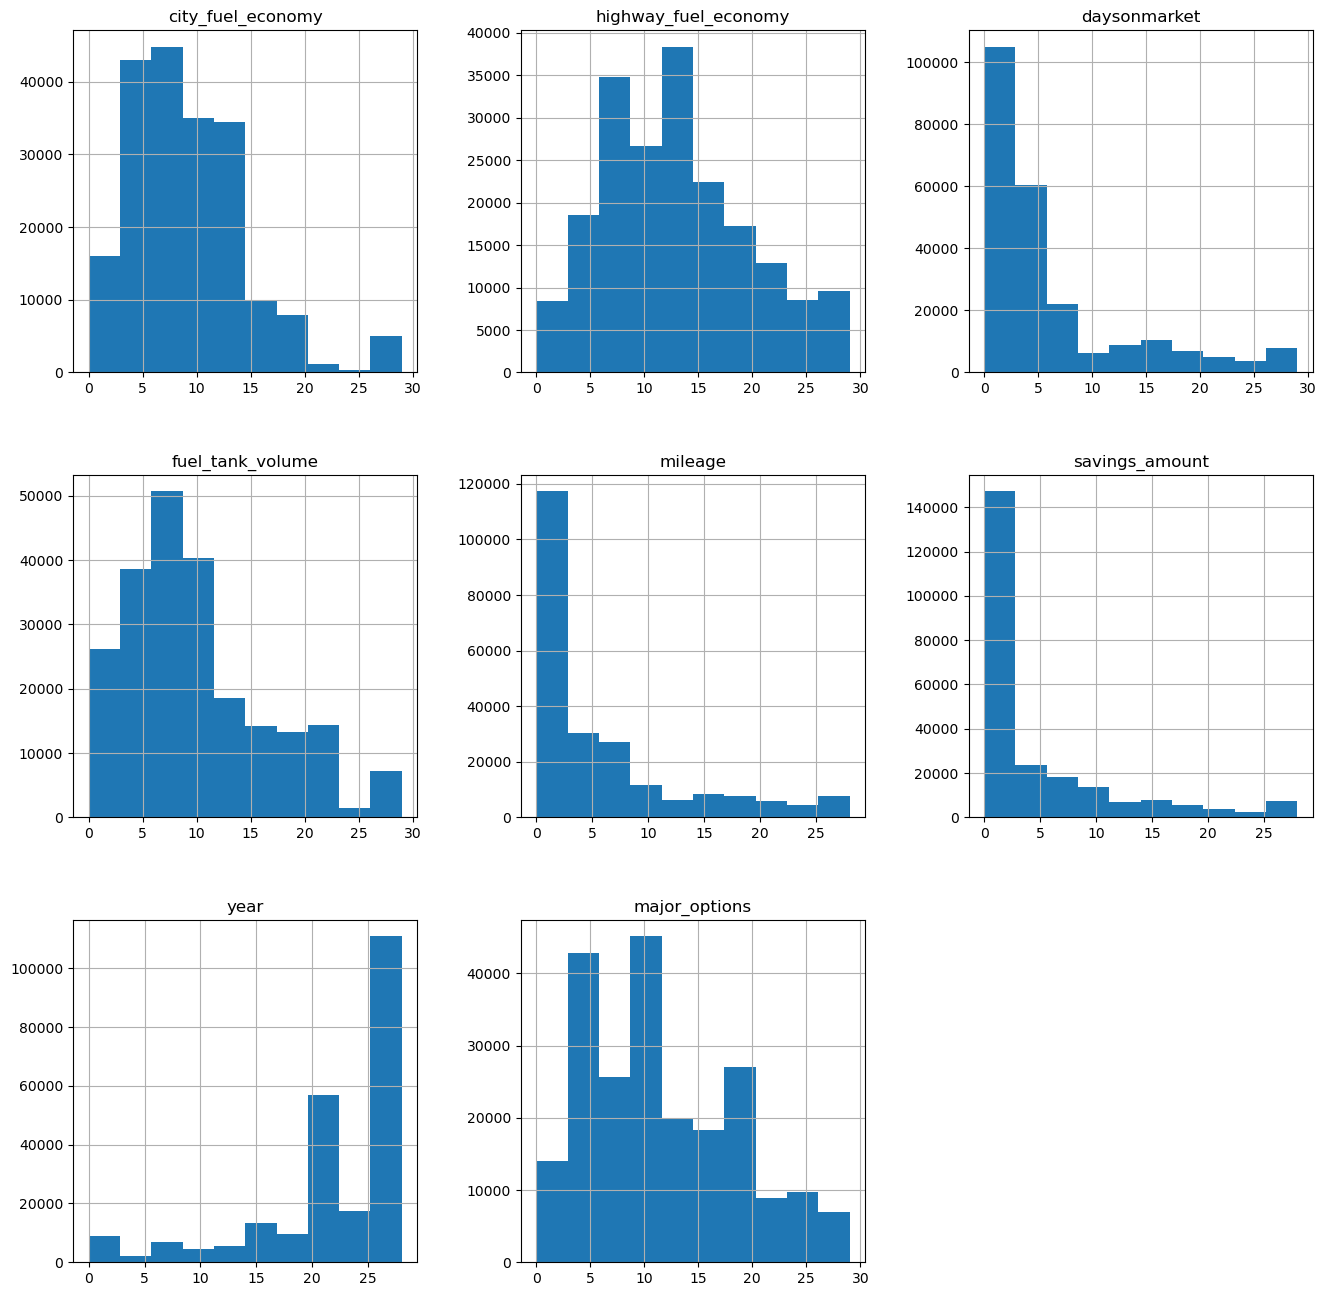

In [52]:
transformed_attr: pd.DataFrame = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
transformed_attr.hist(figsize=(16,16))
mpl.show()

These distributions look much better than before. However there may be a slight issue with `savings_amount` and `city_fuel_economy`. For this one different min, max and bins need to be used. Using contextual knowledge the following conversions are used.

In [53]:
transformed_attr[['city_fuel_economy']] = df[['city_fuel_economy']].apply(lambda x: transform_bins(x, bins=5, min_val=18, max_val=28))

In [54]:
transformed_attr[['savings_amount']] = df[['savings_amount']].apply(lambda x: transform_bins(x, bins=5, min_val=100, max_val=3000))

array([[<Axes: title={'center': 'city_fuel_economy'}>,
        <Axes: title={'center': 'highway_fuel_economy'}>,
        <Axes: title={'center': 'daysonmarket'}>],
       [<Axes: title={'center': 'fuel_tank_volume'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'savings_amount'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'major_options'}>, <Axes: >]],
      dtype=object)

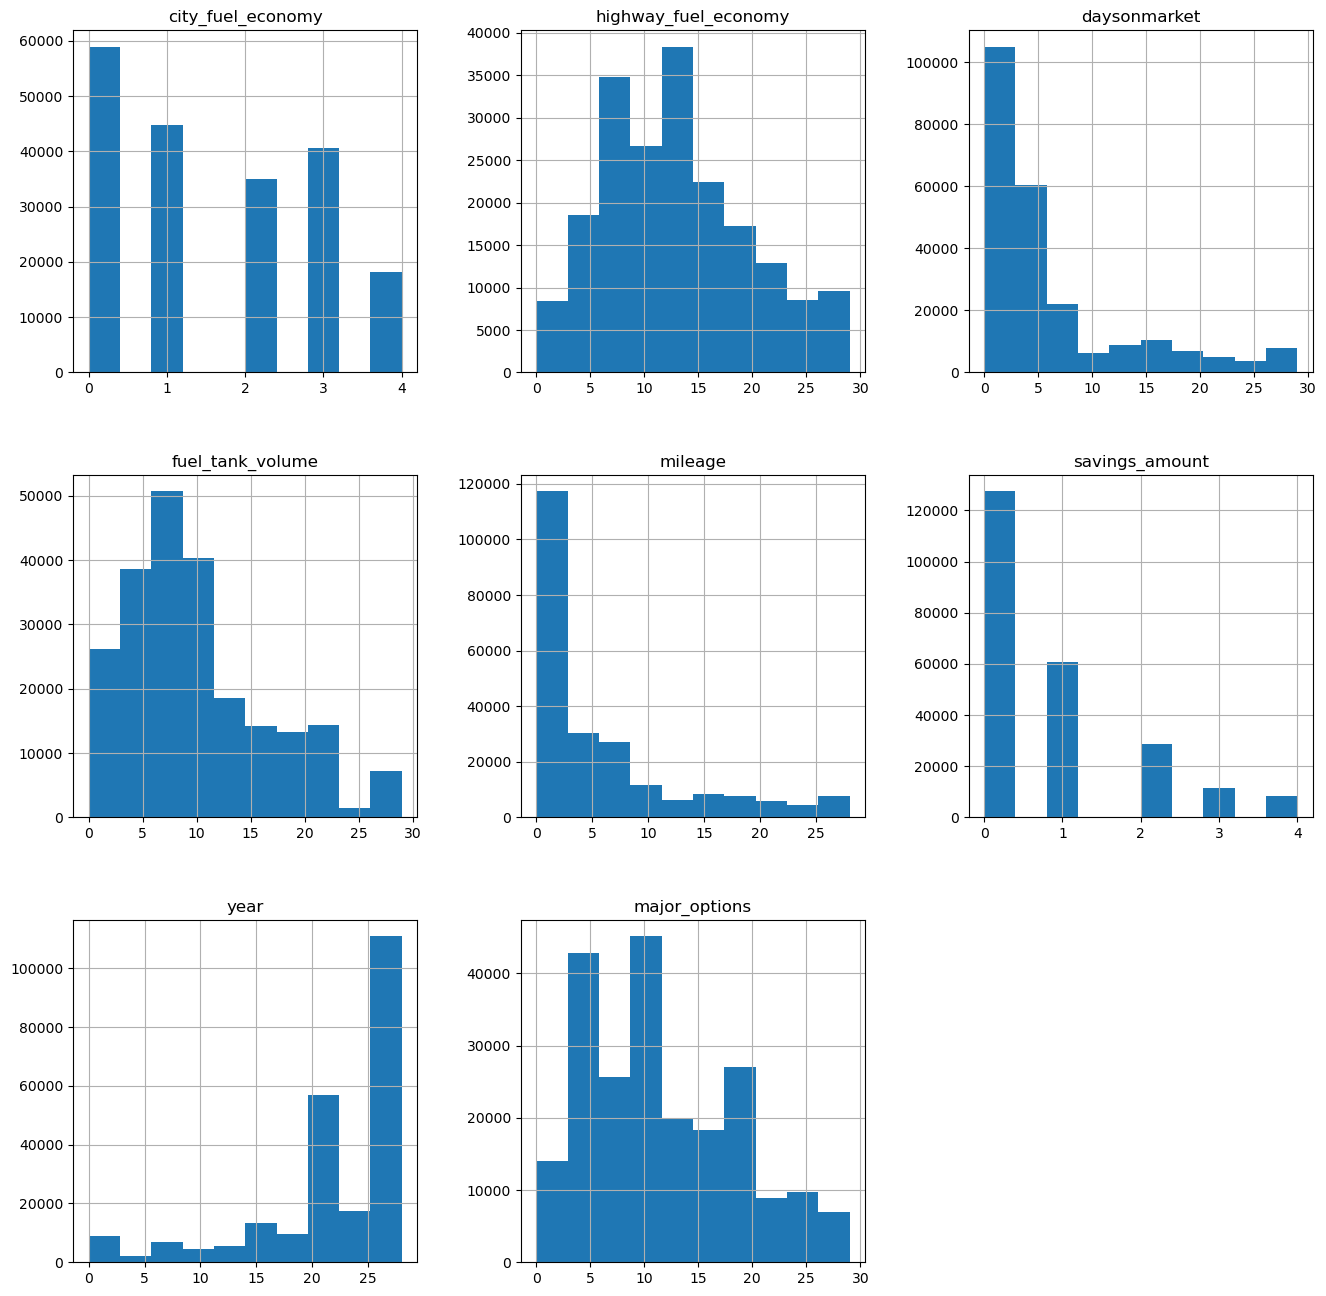

In [55]:
transformed_attr.hist(figsize=(16,16))

These look much better than before. SO now we know what to do with the above attributes should we decide to use them in our model.

In [56]:
# Delete temp dataframe
del(transformed_attr)

After all the exploratory analysis a list of attributes which are hopefully correlated to the `price` attribute have been identified. But before preperation let's take a look at the correlation between the raw numerical attributes and the `price` to maybe eliminate some attributes, reducing the complexity.

### Explore correlations

In [57]:
chosen_numerical_attributes : list = ['daysonmarket', 'latitude', 'longitude', 'price', 'savings_amount', 'year', 'horsepower', 'city_fuel_economy', 
'highway_fuel_economy', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'seller_rating',
'length', 'width']

In [58]:
df_numerical = df.select_dtypes(include=[np.float64, np.int64])[['daysonmarket', 'latitude', 'longitude', 'savings_amount', 'year', 'horsepower', 'city_fuel_economy', 
'highway_fuel_economy', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'seller_rating',
'length', 'width', 'wheelbase']]
# abs taken as don't care if posotive or negative effect
corr_series = abs(df_numerical.apply(lambda x: x.corr(prices)))
# Clean up repeats in memory
del(df_numerical)
corr_series.sort_values()

savings_amount          0.002483
latitude                0.002836
longitude               0.037356
seller_rating           0.057060
daysonmarket            0.096730
city_fuel_economy       0.142668
highway_fuel_economy    0.206845
major_options           0.255699
engine_displacement     0.290894
length                  0.290965
wheelbase               0.293981
fuel_tank_volume        0.321882
year                    0.338366
width                   0.349532
mileage                 0.420551
horsepower              0.513918
dtype: float64

Clearly some of the numerical attributes thought to be useful don't have much of a correlation to `price`.
Now let's choose all attributes with a correlation of more than 0.25 and use some of our contextual knowledge to inspect.

In [59]:
corr_series[corr_series > 0.25]

year                   0.338366
horsepower             0.513918
fuel_tank_volume       0.321882
engine_displacement    0.290894
major_options          0.255699
mileage                0.420551
length                 0.290965
width                  0.349532
wheelbase              0.293981
dtype: float64

All these attributes seem to make logical sense. One attribute that could be removed is one of `wheelbase` or `length` since they represent different ways to measure the length of a car. Since wheelbase has the higher correlation, `length` will be dropped. Let's inspect the above attributes in more detail. Any attributes we had intially chosen but have are not included above will be dropped.

In [60]:
chosen_numerical_attributes = corr_series[corr_series > 0.25].keys().tolist()
chosen_numerical_attributes.remove('length')

In [61]:
df[chosen_numerical_attributes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236401 entries, 240581 to 8555
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 236401 non-null  int64  
 1   horsepower           236401 non-null  float64
 2   fuel_tank_volume     224783 non-null  float64
 3   engine_displacement  224124 non-null  float64
 4   major_options        218461 non-null  float64
 5   mileage              226869 non-null  float64
 6   width                224886 non-null  float64
 7   wheelbase            224888 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 24.3 MB


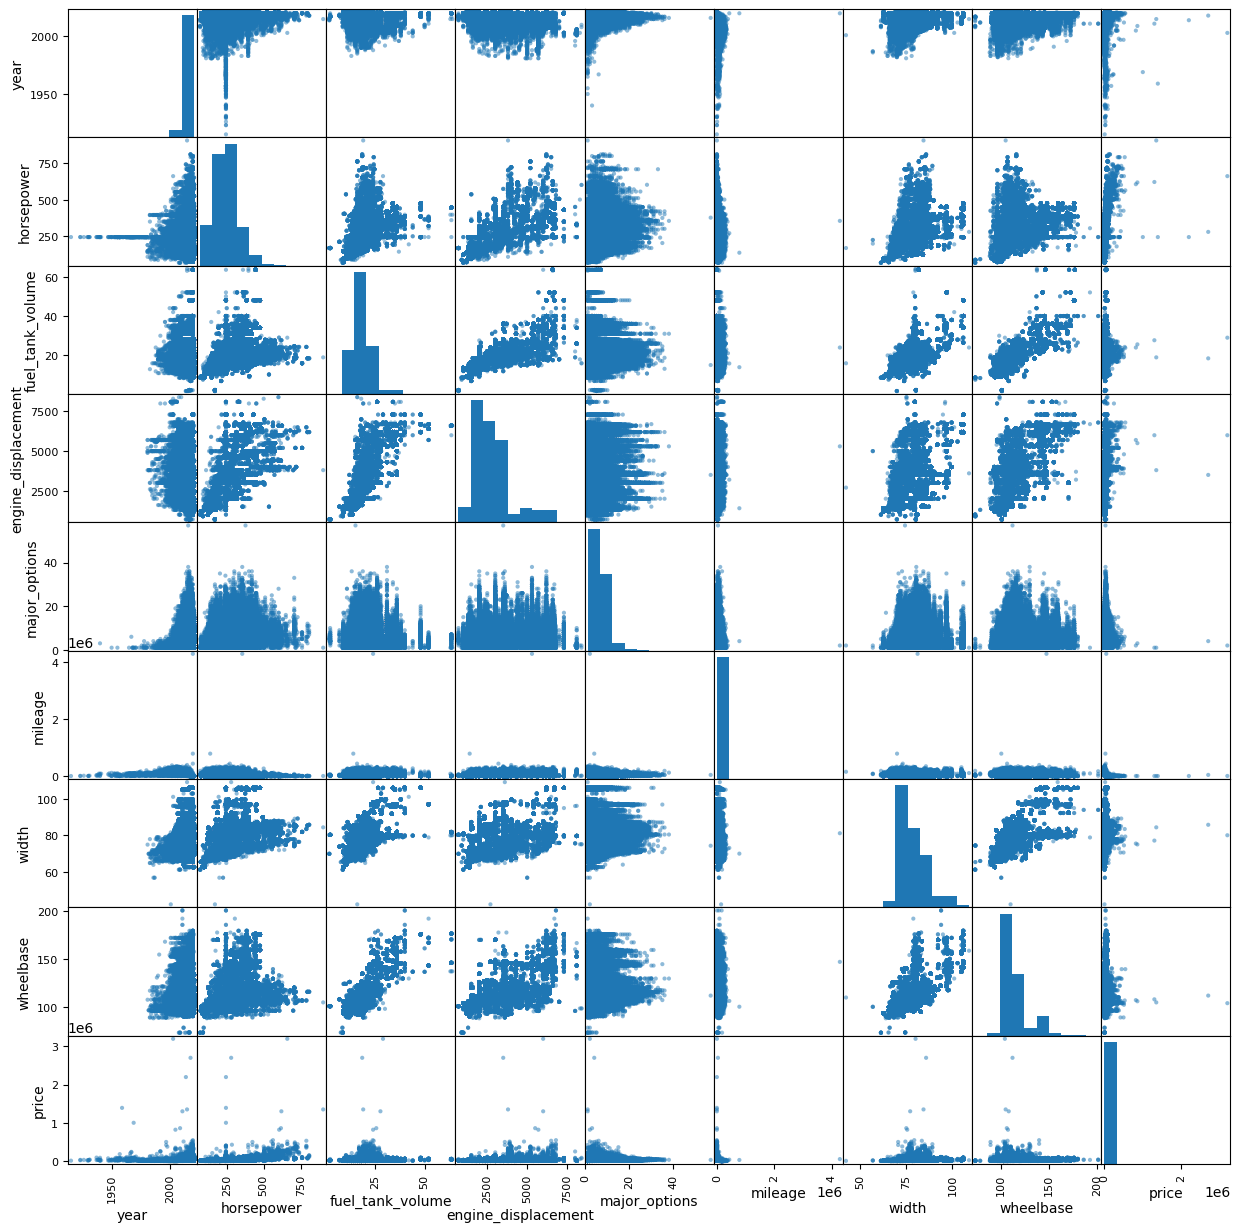

In [62]:
pd.plotting.scatter_matrix(pd.concat([df[chosen_numerical_attributes], prices], axis=1), figsize=(15,15))
mpl.show()

Inspecting the `price` row (or column), `horsepower` and `mileage` have the stongest correlation as to be expected. 
`wheelbase` and `width` appear to have similar correlation to price, which is to be expected by them being a measurement of size.

One important information though is to note all the extreme obeservations, which visibly make identifying correlation harder.

## 4. Prepare data

Now the intial exploration and some of the transformation needed have been identified. The data can start to be prepared.

In [63]:
chosen_attributes : list = chosen_numerical_attributes + chosen_categorical_attributes + chosen_boolean_attributes
df = df[chosen_attributes].copy()

Check out any remaining data values which are missing:

In [64]:
df.count() / sample_size

year                   1.000000
horsepower             1.000000
fuel_tank_volume       0.950855
engine_displacement    0.948067
major_options          0.924112
mileage                0.959679
width                  0.951290
wheelbase              0.951299
body_type              0.996032
engine_type            0.969882
fuel_type              0.975389
listing_color          1.000000
make_name              1.000000
transmission           0.986172
wheel_system           0.955343
franchise_dealer       1.000000
is_new                 1.000000
dtype: float64

### Imputation
Let's fix the null values.

Now we want to start thinking about making our pipeline, let's make some custom transformers to act on our data. Note the transformer created will be used in place of the process for `horsepower` for ease.

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

class WithinGroupImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_var):
        self.group_var = group_var
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_ = X.copy()
        for col in X_.drop(self.group_var, axis=1).columns:
            if X_[col].dtypes == 'float64':
                # For float types impute with median of group or overall if not available
                X_.loc[(X[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].median())
                X_[col] = X_[col].fillna(X_[col].median())
            if X_[col].dtypes == 'object':
                # For object types impute with mode of group or overall if not available
                X_.loc[(X[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan))
                overall_mode = str(X_[self.group_var].mode().tolist()[0])
                # Library has issues with object atttributes and NaN so need to replace them with np.NaN explciitly
                X_.loc[:, col] = X_[col].fillna(np.nan).replace(np.nan, overall_mode)
        return X_

One important thing for imputations I have done is to make sure that any imputations are done from the raw data only, and not from other imputations. This reduces any bias introduced. So for example if the mode of groups is assigned to an attribute, the groups the cars belong to are not found by imputation themselves.

Similar to what happened for `horsepower `, `wheelbase` and `width` can assumed to be similar measures of a cars size and hence the `body_type` can be used as a proxy. This is chosen for the high number of non-null values. For any which don't have the `body_type` attribute the overall average will be used. For this imputation we will use the custom transformer `WithinGroupImputer`.

In [66]:
body_group_imp = WithinGroupImputer(group_var='body_type')
df[['wheelbase']] = body_group_imp.fit_transform(df[['wheelbase', 'body_type']])[['wheelbase']]
df[['width']] = body_group_imp.fit_transform(df[['width', 'body_type']])[['width']]

In [67]:
# Check everything worked
df[['wheelbase', 'width']].count() / sample_size

wheelbase    1.0
width        1.0
dtype: float64

For `mileage`, `year` will be used as a proxy, with the median from that year assigned, median is used as should be a nice symmetrical distribution for each year. An example to support this is shown below.

<Axes: >

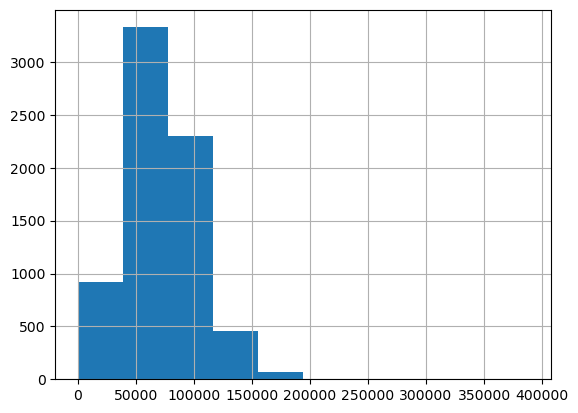

In [68]:
df[df.year == 2015].mileage.hist()

In [69]:
year_group_imp = WithinGroupImputer(group_var='year')
df[['mileage']] = year_group_imp.fit_transform(df[['mileage', 'year']])[['mileage']]

In [70]:
# Check everything worked
df.mileage.count() / sample_size

1.0

For `major_options` the median will be taken, since the number of different possible options is low and a central discrete metric is desried. For this a `SimpleImputer` is used.

In [71]:
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')
df[['major_options']] = median_imp.fit_transform(df[['major_options']])

For `wheel_system` the `body_type` will be used as a proxy, and the mode for the given body type will be taken as the value. Note this imputation is done before the imputation of `body_type` to reduce inducing bias.

In [72]:
df[['wheel_system']] = body_group_imp.fit_transform(df[['wheel_system', 'body_type']])[['wheel_system']]

For `fuel_tank_volume` this is likely proportional to the type of car, so the median of the `fuel_tank_volume` for the `body_type` can be used as proxy. Think about hatchbacks vs trucks.

In [73]:
df[['fuel_tank_volume']] = body_group_imp.fit_transform(df[['fuel_tank_volume', 'body_type']])[['fuel_tank_volume']]

Similarly for `transmission` as few entries missing, the mode will be used.

In [74]:
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['transmission']] = mode_imp.fit_transform(df[['transmission']])

For `fuel_type` let's examine the attribute in more detial

In [75]:
df.fuel_type.value_counts()

Gasoline                  210576
Flex Fuel Vehicle          10383
Hybrid                      4788
Diesel                      2399
Biodiesel                   1275
Electric                    1153
Compressed Natural Gas         9
Name: fuel_type, dtype: int64

Clearly an overwhelming majority is Gasoline, so let's fill all NaNs with Gasoline. Mode impute would work as well.

In [76]:
df['fuel_type'] = df['fuel_type'].fillna('Gasoline')

For `engine_displacement` the attribute is given the median for an entry with a given `engine_type`, then filled with the overall median if no `engine_type` is present.

In [77]:
engine_group_imp = WithinGroupImputer(group_var='engine_type')
df[['engine_displacement']] = engine_group_imp.fit_transform(df[['engine_displacement', 'engine_type']])[['engine_displacement']]

Now let's deal with `engine_type`. Let's take a closer look at the options available a bit closer:

In [78]:
df.engine_type.value_counts()

I4                           114915
V6                            58505
V8                            18557
H4                            10234
V8 Flex Fuel Vehicle           5021
V6 Flex Fuel Vehicle           4785
I4 Hybrid                      4519
I3                             4073
I6                             2953
V8 Biodiesel                   1102
I6 Diesel                       680
V6 Diesel                       664
I4 Diesel                       606
I4 Flex Fuel Vehicle            569
I5                              543
H6                              434
V8 Diesel                       319
V6 Hybrid                       247
V6 Biodiesel                    169
V12                             145
V10                              93
W12                              52
I2                               43
H4 Hybrid                        12
V8 Hybrid                        10
V8 Compressed Natural Gas         9
W12 Flex Fuel Vehicle             8
R2                          

Inital thoughts are there a lot of different categories so this may be a difficult attribute to fix. Let's explore the the relation between `make_name` and `engine_type`.

In [79]:
groups = df.groupby('make_name')
pd.set_option("display.max_rows", None)
groups.engine_type.value_counts()

make_name      engine_type              
Acura          V6                            1935
               I4                             970
               V6 Hybrid                       26
               I4 Hybrid                        3
               I5                               1
Alfa Romeo     I4                             758
               V6                              10
Aston Martin   V8                              55
               V12                             30
Audi           I4                            2698
               V6                            1069
               V8                             206
               V10                             32
               V6 Diesel                       22
               I4 Diesel                       16
               I5                              13
BMW            I4                            3174
               I6                            1986
               V8                             558
         

In [80]:
# Add max rows back
pd.set_option("display.max_rows", 10)

From the above with visual inspection if the mode for a given `make_name` is taken as the `engine_type` this should give a good imputation. Logically most manufactures will mass produce one or similar engine types for all vehicles to reduce production costs. Although there is some outliers in this since there is only a few to fill, this simple method is chosen.

In [81]:
make_name_imp = WithinGroupImputer(group_var='make_name')
df[['engine_type']] = make_name_imp.fit_transform(df[['engine_type', 'make_name']])[['engine_type']]

Let's check this worked okay

In [82]:
df.engine_type.value_counts()

I4                       120671
V6                        59161
V8                        18842
H4                        10528
V8 Flex Fuel Vehicle       5021
                          ...  
W12 Flex Fuel Vehicle         8
R2                            7
I5 Biodiesel                  4
I5 Diesel                     2
W8                            1
Name: engine_type, Length: 32, dtype: int64

That looks all good.

For `body_type` since there is very few entries missing, the mode for the attribute would make sense for this catagorical attribute.

In [83]:
df[['body_type']] = mode_imp.fit_transform(df[['body_type']])

Let's check all the data is looking good.

In [84]:
df.keys()[df.isna().any()]

Index([], dtype='object')

Fantastic, all is good!

Now all NaNs have been dealt with let's see if the transformations discussed earlier still need applying. The only attributes from before that we transformed left are:
- `fuel_tank_volume` 
- `mileage`
- `year`

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'fuel_tank_volume'}>],
       [<Axes: title={'center': 'engine_displacement'}>,
        <Axes: title={'center': 'major_options'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'wheelbase'}>, <Axes: >]], dtype=object)

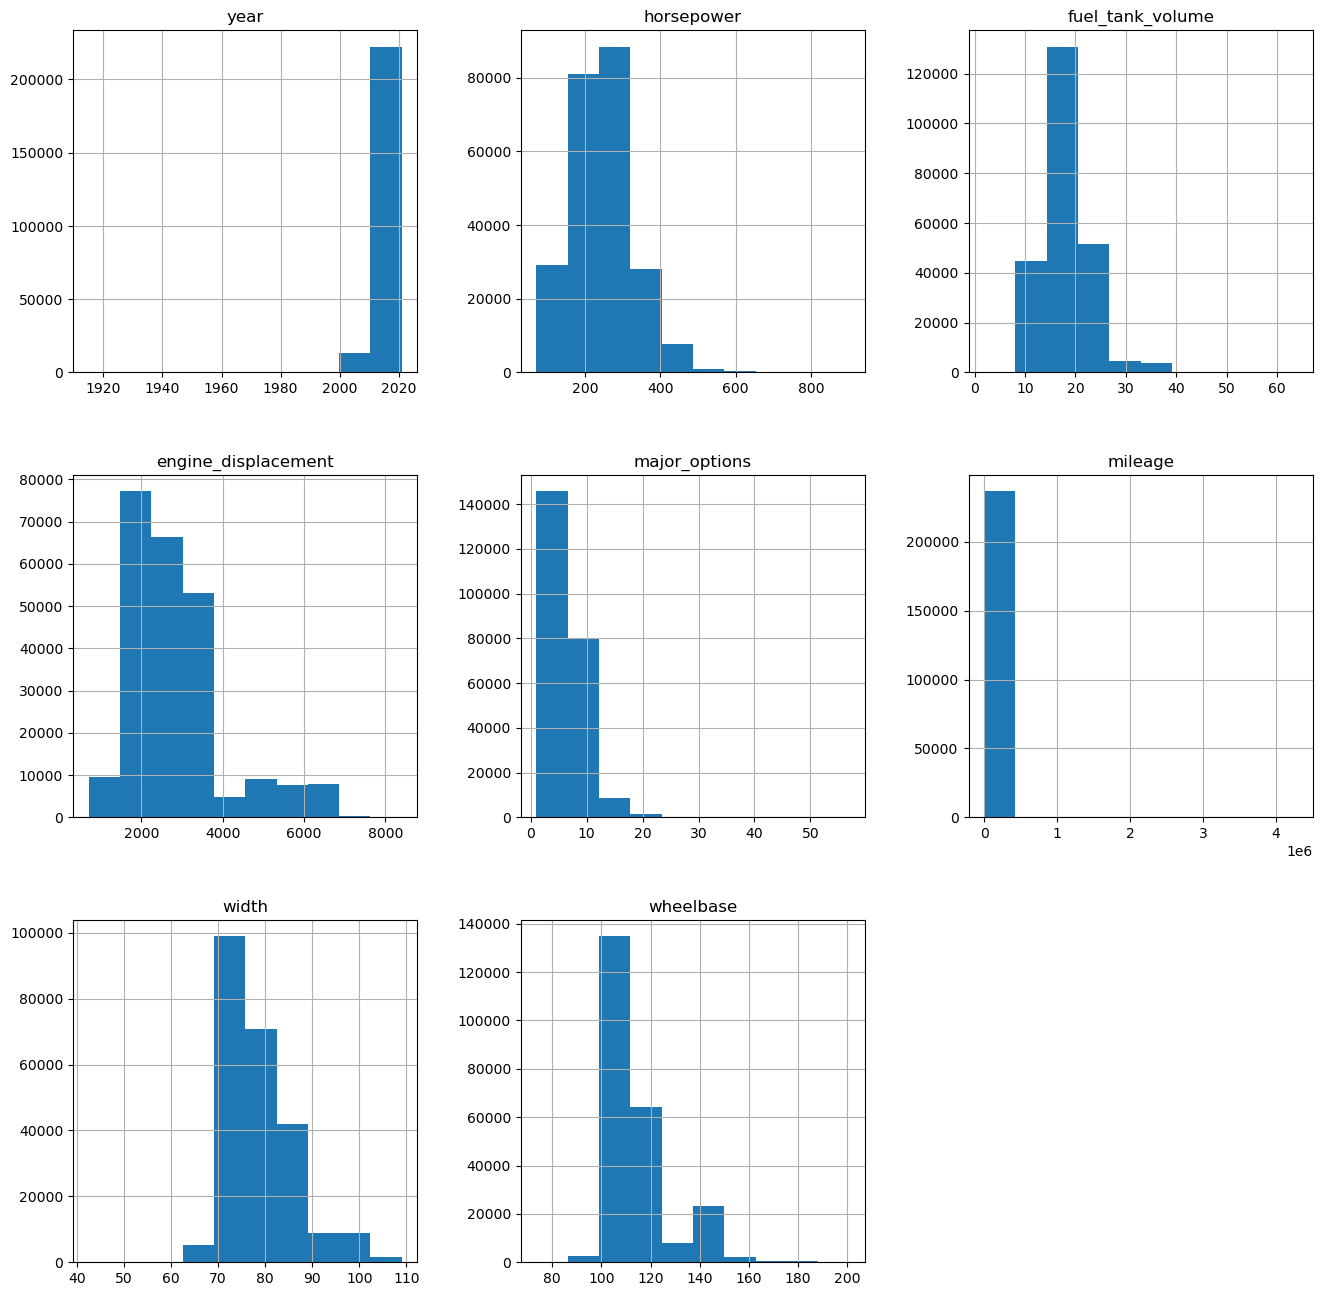

In [85]:
df.hist(figsize=(16,16))

`year` and `mileage` appear to be the only ones that still need transforming from before. Let's do it same as before:

array([[<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'major_options'}>, <Axes: >]],
      dtype=object)

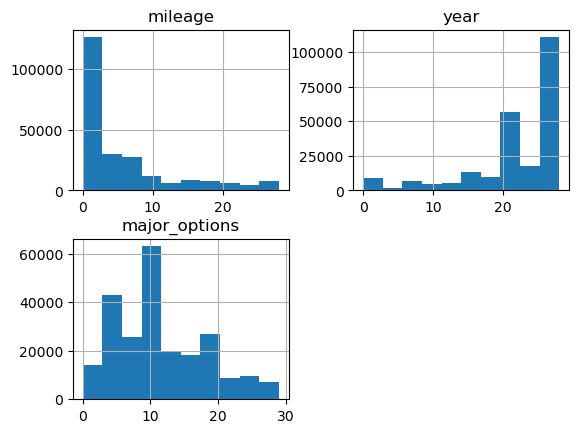

In [86]:
transform_attributes: list = ['mileage', 'year', 'major_options']
df[transform_attributes] = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
df[transform_attributes].hist()

These look much better than before.

The next step is to encode the categorical data to be meaning full.

So for all these attribute there is no intrinsic ranking. Although `engine_type` could be, there is no factual way of saying which is 'better'. So, one-hot-encoding will be used,

In [87]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

categorical_data : list = df.select_dtypes(include='object').keys().tolist()
df_categorical_encoded = one_hot_encoder.fit_transform(df[categorical_data].astype('str'))

Let's do the same for the boolean attributes now.

In [88]:
bool_data: list = df.select_dtypes(bool).keys().tolist()
df_bool_encoded = one_hot_encoder.fit_transform(df[bool_data])

Final step for our data is to scale the numerical features so the algorithgms work well. We'll go with the standardisation scaling since most of the data does not have massively large tails. The only ones that may pose an issue are mileage and year, since they do have longer tails than the others.

In [89]:
from sklearn.preprocessing import StandardScaler

numerical_data: list = df.select_dtypes(include=[np.int64, np.float64]).keys().tolist()

scaler = StandardScaler()
df_numerical_encoded = pd.DataFrame(scaler.fit_transform(df[numerical_data]), columns = numerical_data)
df_numerical_encoded.head(5)

,year,horsepower,fuel_tank_volume,engine_displacement,major_options,mileage,width,wheelbase
0,0.692598,1.378864,-0.622949,-0.705083,-0.919415,-0.706952,0.808963,-0.240783
1,0.692598,0.767686,0.653106,0.593359,1.509468,-0.706952,0.025911,0.503524
2,0.692598,0.121248,-0.204244,-0.705083,-0.347913,-0.706952,0.561684,-0.082900
3,0.092920,-0.995328,-0.523258,-1.110846,-0.633664,0.500540,-0.743404,-0.210710
4,0.692598,0.297549,-0.084613,-0.461625,-1.205166,-0.706952,1.015030,0.947100


Let's check they look okay:

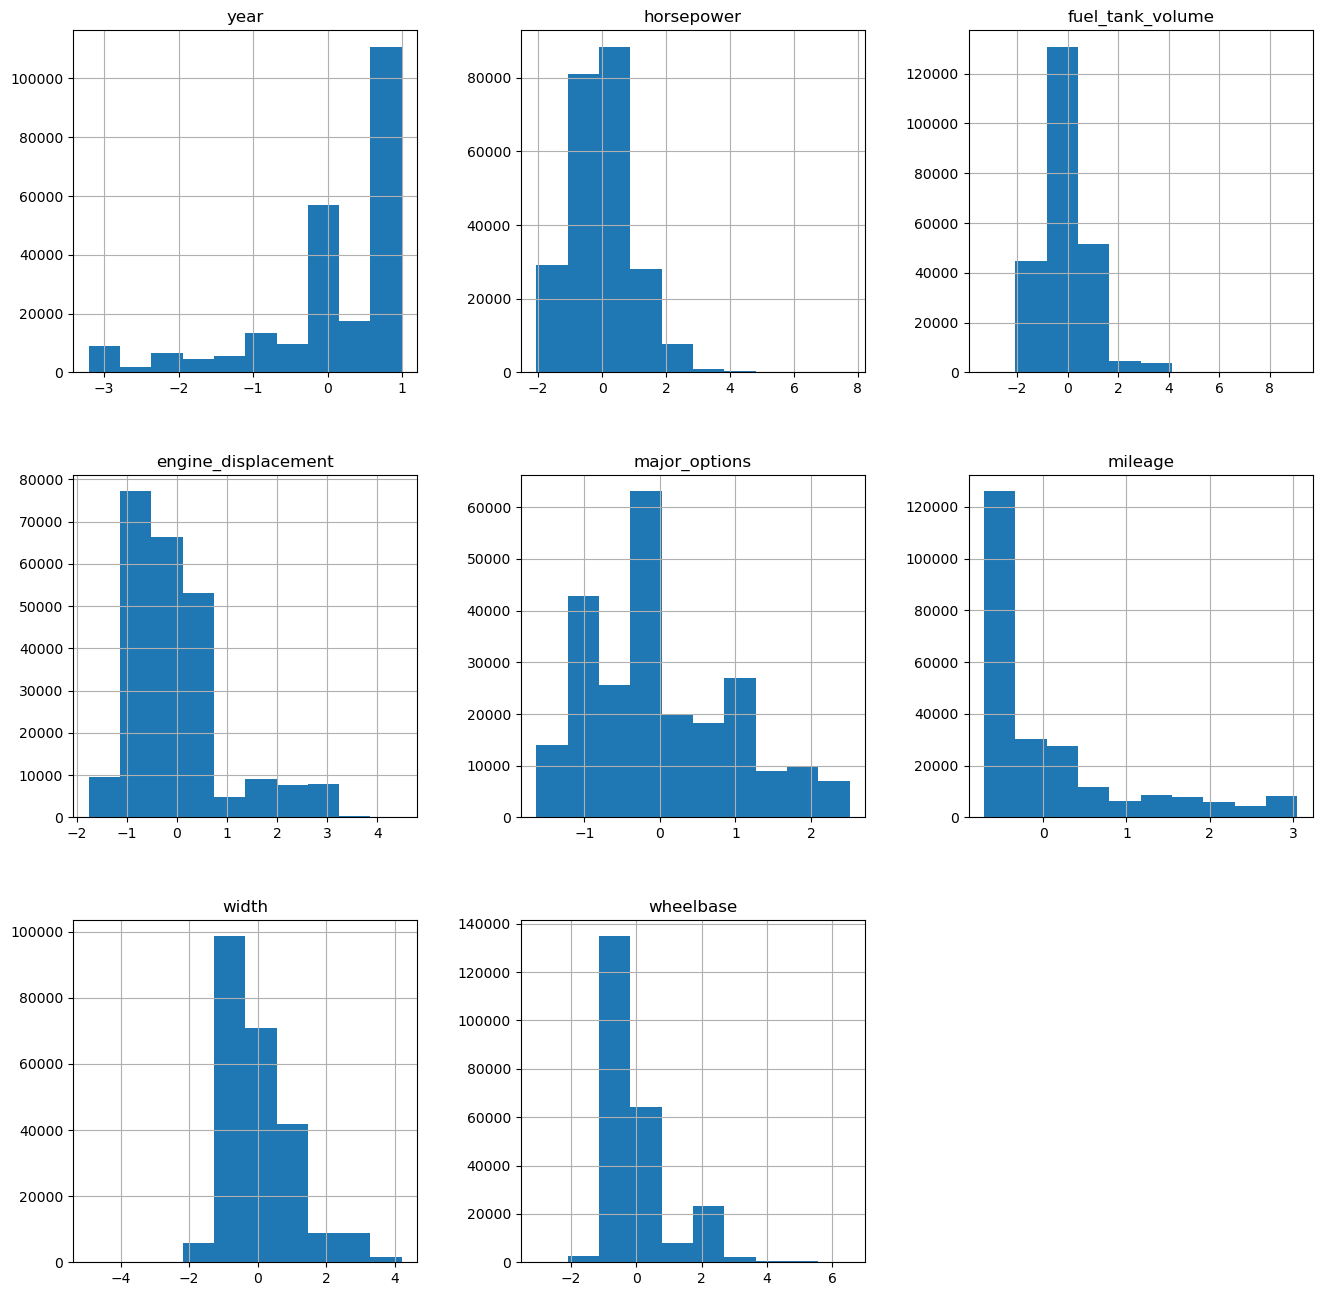

In [90]:
df_numerical_encoded.hist(figsize=(16,16))
mpl.show()

They all look good. Let's carry on.

`df` and the other data copies can now be deleted as we have successfully explored the data and decided what to do in preprocessing.

In [91]:
del(df_bool_encoded, df_categorical_encoded, df_numerical_encoded)

In [92]:
del(df)

### Transformation pipelines
Now we have figured out the data preproccessing, let's turn this into a pipeline.

Firstly, let's get the names of all the attributes we need from the dataset. And print the head of the orignial `train_set` so the index of each attribute can be seen. This is need for some section of the pipeline as the data is passed as numpy arrays, so all index and attributes need to match correctly.*

*\*We don't worry about this before as the columns are assigned directly one at a time so numpy form is no issue*

In [93]:
print(chosen_attributes)
stratified_train_set[chosen_attributes].head(5)

['year', 'horsepower', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'width', 'wheelbase', 'body_type', 'engine_type', 'fuel_type', 'listing_color', 'make_name', 'transmission', 'wheel_system', 'franchise_dealer', 'is_new']


,year,horsepower,fuel_tank_volume,engine_displacement,major_options,mileage,width,wheelbase,body_type,engine_type,fuel_type,listing_color,make_name,transmission,wheel_system,franchise_dealer,is_new
240581,2020,362.0,15.3 gal,2000.0,"['Leather Seats', 'Navigation System', 'Conven...",27.0,84.3 in,111 in,SUV / Crossover,I4,Gasoline,WHITE,Audi,A,AWD,True,True
24368,2020,310.0,21.7 gal,3600.0,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",0.0,78.6 in,120.9 in,SUV / Crossover,V6,Gasoline,BLACK,Chevrolet,A,4WD,True,True
222132,2020,255.0,17.4 gal,2000.0,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",2660.0,82.5 in,113.1 in,SUV / Crossover,I4,Gasoline,GRAY,Mercedes-Benz,A,AWD,True,False
17013,2018,160.0,15.8 gal,1500.0,"['Alloy Wheels', 'Backup Camera', 'Android Aut...",47646.0,73 in,111.4 in,Sedan,I4,Gasoline,WHITE,Chevrolet,A,FWD,True,False
189645,2020,270.0,18 gal,2300.0,"['Backup Camera', 'Remote Start']",13.0,85.8 in,126.8 in,Pickup Truck,I4,Gasoline,BLACK,Ford,A,4WD,True,True


Next let's inspect the attributes

In [94]:
all_attributes = numerical_data + categorical_data + bool_data
all_attributes

['year',
 'horsepower',
 'fuel_tank_volume',
 'engine_displacement',
 'major_options',
 'mileage',
 'width',
 'wheelbase',
 'body_type',
 'engine_type',
 'fuel_type',
 'listing_color',
 'make_name',
 'transmission',
 'wheel_system',
 'franchise_dealer',
 'is_new']

For numerical data we need to remeber that `year`, `major_options` and `mileage` are in indicies 0, 4 and 5 respectively. 

The `WithinGroupImputer` has been redefined since to work with a pipeline it needs to be able to be manipulated more than it was before.

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class WithinGroupImputer(BaseEstimator, TransformerMixin):
    """
    Custom transformer which returns mode of specified group attribute for a attribute
    
    ...
    
    Parameters
        ----------
            group_var : str
                the grouping attribute key
            attr : str
                the attribute for which to give mode

    """
    
    def __init__(self, group_var, attr):
        self.group_var = group_var
        self.attr = attr
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_ = X.copy()
        for col in self.attr:
            if X_[col].dtypes == 'float64':
                # For float types impute with median of group or overall if not available
                X_.loc[(X_[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].median())
                X_[col] = X_[col].fillna(X_[col].median())
            if X_[col].dtypes == 'object':
                # For object types impute with mode of group or overall if not available
                X_.loc[(X_[col].isna()) & X_[self.group_var].notna(), col] = X_[self.group_var].map(X_.groupby(self.group_var)[col].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan))
                overall_mode = str(X_[self.group_var].mode().tolist()[0])
                
                # Library has issues with object atttributes and NaN so need to replace them with np.NaN explciitly
                X_.loc[:, col] = X_[col].fillna(np.nan).replace(np.nan, overall_mode)
        return X_

class ExctractAttributesTransform(BaseEstimator, TransformerMixin):
    """
    Custom transformer to extract any numerical attributes from specified
    object type attributes.
    """
    
    def __init__(self):
        self.cols_to_convert = ['fuel_tank_volume', 'wheelbase', 'width']
        self.cols_to_summarise = 'major_options'
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_ = X.copy()
        X_[self.cols_to_convert] = X_[self.cols_to_convert].applymap(convert_measurement).astype(np.float64)
        X_[self.cols_to_summarise] = X_[self.cols_to_summarise].apply(lambda x: len(x.split(",")) if type(x) == str else "NaN").astype(np.float64)
        return X_
    
class columnDropperTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer which drops specified columns
    
    Parameters
        ----------
            columns : lisy
                specified columns to drop

    """
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self 
    
    def transform(self,X):
        return X.drop(self.columns,axis=1)

class dataFix(BaseEstimator, TransformerMixin):
    """
    Custom transformer to apply custom fixes to data during pipeline
    """
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_ = X.copy()
        mask = X_['engine_type'].str.len() == 0
        overall_mode = X_['engine_type'].mode()[0]
        X_.loc[mask, 'engine_type'] = overall_mode
        return X_.astype(str) # need to convert for encoder
    
class transformNumericalAttributes(BaseEstimator, TransformerMixin):
    """
    Custom transformer which maps data with sparse bins to a set with no sparse bins.
    Used when data has long tails.
    """
    
    def __init__(self):
        # Indexes corresponding to year, mileage and major_options
        self.transform_attributes_index = [0, 4, 5]
        
    def fit(self, X, y=None):
        return self
            
    def transform(self, X):
        X_ = X.copy()
        df = pd.DataFrame(X_[:, self.transform_attributes_index]).apply(lambda x: transform_bins(x, bins=30))
        X_[:, self.transform_attributes_index] = df
        return X_

numerical_pipeline = Pipeline([
        ('extract_numericals', ExctractAttributesTransform()),
        ('impute_num_body_groupby', WithinGroupImputer('body_type', ['wheelbase', 'width', 'fuel_tank_volume'])),
        ('impute_num,_year_groupby', WithinGroupImputer('year',  ['mileage'])),
        ('impute_num_engine_groupby', WithinGroupImputer('engine_type', ['engine_displacement', 'horsepower'])),
        ('drop_grouping_attr', columnDropperTransformer(columns=['body_type', 'engine_type'])),
    
        # Fills any remaining numerical NaN with mdeian, should only apply to major_options
        # Note this step returns a numpy array so must use index from now on
        ('basic_impute', SimpleImputer(strategy='median')),
        ('transform_skewed', transformNumericalAttributes()),
        ('scaler', StandardScaler())
    ])

categorical_pipeline = Pipeline([
    ('impute_cat_body_groupby', WithinGroupImputer('body_type', ['wheel_system'])),
    ('impute_cat_make_groupby', WithinGroupImputer('make_name', ['engine_type'])),
    ('fixes', dataFix()),
    
    # Basic mode for transmission, body_type and fuel_type
    ('basic_mode_imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

bool_pipeline = Pipeline([
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, (numerical_data + ['body_type', 'engine_type'])),
    ("categorical", categorical_pipeline, categorical_data),
    ("bool", bool_pipeline, bool_data)
])

pipeline = full_pipeline.fit(stratified_train_set[chosen_attributes])
prepared_data = pipeline.transform(stratified_train_set[chosen_attributes])

Let's have a quick look at the data

In [96]:
pd.DataFrame(prepared_data.toarray()).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,0.692598,1.362037,-0.622949,-0.705083,-0.919415,-0.706952,0.808963,-0.240783,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.692598,0.756016,0.653106,0.593359,1.509468,-0.706952,0.025911,0.503524,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.692598,0.115032,-0.204244,-0.705083,-0.347913,-0.706952,0.561684,-0.082900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.092920,-0.992121,-0.523258,-1.110846,-0.633664,0.500540,-0.743404,-0.210710,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.692598,0.289846,-0.084613,-0.461625,-1.205166,-0.706952,1.015030,0.947100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.992437,-0.817307,-0.244120,-0.299320,0.652215,-0.706952,-0.042778,-0.285892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Clearly there is a lot of attribute, this may mean the model takes a while to fit, it could be worth reducing attributes in the future to reduce training time. This could be done by encoding some of the numerical data as groups and using a ordinal encoding or by grouping some of the categorical attributes together.

Before moving on to the next part let's clean up what we have in memory.

## 5. Exploring models 
In this section, 3 different models will be explored and their performances assessed using the `prepared_data` training set from above. Whilst this is not the whole dataset from the large file, as it was chosen using the stratified sampling method it should be a good representation of the overall dataset, and by using this smaller set the exploration should be quicker.
### Linear regression model
Since `price` is a numerical attribute a linear regression model makes sense. Let's try this model first.

In [97]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
# Fit the model
linear_regression.fit(prepared_data, prices[train_set_index])

LinearRegression()

Let's sample some random test data from the `test_set` to try it out.

In [98]:
test_data = stratified_test_set.sample(1000, random_state=11)
pd.DataFrame(test_data).head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
50274,2FMPK4AP4LBA68571,40.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,Rochester Hills,19.0,NaN,187,48307,"2020 Ford Edge ST $13,121 off MSRP! 110V/150W ...",V6,2700.0,V6,Silver,NaN,NaN,True,Ford,42.6 in,18.5 gal,Gasoline,NaN,68.3 in,26.0,335.0,Black (Ebony),NaN,NaN,NaN,True,NaN,42.6381,188.8 in,2020-03-06,SILVER,267833229,-83.1319,https://static.cargurus.com/images/forsale/202...,"['Navigation System', 'Adaptive Cruise Control...",Ford,5 seats,3.0,Edge,NaN,"335 hp @ 5,500 RPM",NaN,0,4.500000,56378.0,Serra Ford Rochester Hills,NaN,"380 lb-ft @ 3,500 RPM",A,8-Speed Automatic,t87983,ST AWD,NaN,AWD,All-Wheel Drive,112.2 in,85.8 in,2020
278616,JF2GTHMC8MH214381,36.5 in,NaN,NaN,NaN,SUV / Crossover,NaN,Plattsburgh,27.0,NaN,11,12901,"Heated Leather Seats, Aluminum Wheels, All Whe...",H4,2500.0,H4,HORIZON BLU PRL,NaN,NaN,True,Subaru,43.1 in,16.6 gal,Gasoline,NaN,63.6 in,34.0,182.0,None,NaN,NaN,NaN,True,NaN,44.6835,176.5 in,2020-08-29,UNKNOWN,280799290,-73.4504,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Adaptive Cruise Control', '...",Subaru,5 seats,5.0,Crosstrek,NaN,"182 hp @ 5,800 RPM",NaN,0,3.666667,51161.0,DELLA Subaru,NaN,"176 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t93904,Limited AWD,NaN,AWD,All-Wheel Drive,104.9 in,71 in,2021
241750,1GKKNLLS5LZ177673,39.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Portage,18.0,NaN,188,49002,WE DELIVER! BUY ONLINE-TEXT-EMAIL-CHAT-PHONE A...,V6,3600.0,V6,Carbon Black Metallic,NaN,NaN,True,GMC,41 in,22 gal,Gasoline,NaN,66.7 in,25.0,310.0,Jet Black,NaN,NaN,NaN,True,NaN,42.2216,193.4 in,2020-03-05,BLACK,267705680,-85.5895,https://static.cargurus.com/images/forsale/202...,"['Sunroof/Moonroof', 'Navigation System', 'SE ...",GMC,7 seats,15.0,Acadia,NaN,"310 hp @ 6,700 RPM",NaN,0,4.333333,345083.0,Cole Buick GMC Cadillac,NaN,"271 lb-ft @ 4,900 RPM",A,9-Speed Automatic,t86720,AT4 AWD,NaN,4WD,Four-Wheel Drive,112.5 in,75.4 in,2020
144748,KL7CJNSBXLB064560,35.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Washington,24.0,NaN,242,48095,Trax LS Summit White 4D Sport Utility ECOTEC 1...,I4,1400.0,I4,Summit White,NaN,NaN,True,Chevrolet,40.8 in,14 gal,Gasoline,NaN,65.2 in,29.0,138.0,Black,NaN,NaN,NaN,True,NaN,42.7660,167.6 in,2020-01-11,WHITE,262960754,-83.0183,https://inventory-dmg.assets-cdk.com/5/5/3/243...,"['SE Package', 'Alloy Wheels', 'Backup Camera']",Chevrolet,5 seats,2.0,Trax,NaN,"138 hp @ 4,900 RPM",NaN,0,4.944444,49821.0,Heidebreicht Chevrolet,NaN,148 lb-ft @ 200 RPM,A,Automatic,t85768,LS AWD,NaN,AWD,All-Wheel Drive,100.6 in,69.9 in,2020
219004,3FA6P0T91LR253001,38.3 in,NaN,NaN,NaN,Sedan,NaN,Saco,20.0,NaN,19,4072,Home Delivery --- Just Announced 0% APR for 72...,I4,2000.0,I4,Magnetic Metallic,False,False,True,Ford,44.3 in,18 gal,Gasoline,False,58.1 in,29.0,245.0,Black (Ebony),False,NaN,NaN,True,NaN,43.5371,191.7 in,2020-08-21,GRAY,279946920,-70.4214,https://static.cargurus.com/images/forsale/202...,"['Sunroof/Moonroof', 'Navigation System', 'Ada...",Ford,5 seats,10.0,Fusion,NaN,NaN,False,0,4.800000,273868.0,Prime Ford - Saco,False,NaN,A,6-Speed Automatic,t86415,SE AWD,NaN,AWD,All-Wheel Drive,112.2 in,83.5 in,2020


In [99]:
# Check out the prices
test_labels = prices[test_data.index]
pd.DataFrame(test_labels).head(5)

,price
50274,37644.0
278616,31430.0
241750,43736.0
144748,22566.0
219004,25120.0


In [100]:
# Transform the data
test_data_prepared = pipeline.transform(test_data)
pd.DataFrame(test_data_prepared.toarray()).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,0.692598,1.047372,0.015079,-0.137015,0.652215,-0.706952,1.015030,-0.150564,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.992437,-0.735727,-0.363751,-0.299320,0.652215,-0.706952,-1.018160,-0.699396,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.692598,0.756016,0.712922,0.593359,0.223589,-0.706952,-0.413698,-0.128009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.692598,-1.248514,-0.882148,-1.191999,-0.919415,-0.706952,-1.169275,-1.022681,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.692598,-0.001510,-0.084613,-0.705083,1.223717,-0.706952,0.699061,-0.150564,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [101]:
# Make predictions
test_predictions = linear_regression.predict(test_data_prepared).round()
test_predictions[:5]

array([44993., 34638., 43869., 23289., 35220.])

In [102]:
# Briefly compare
np.array(test_labels)[:5], test_predictions[:5]

(array([37644., 31430., 43736., 22566., 25120.]),
 array([44993., 34638., 43869., 23289., 35220.]))

Using our performance metric let's assess the model

In [103]:
from sklearn.metrics import mean_squared_error

linear_regression_price_predictions = linear_regression.predict(test_data_prepared)
linear_regression_mse = mean_squared_error(test_labels, linear_regression_price_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)

# Output point estimate
np.round(linear_regression_rmse)

15962.0

Whilst this is useful, it doesn't give any idea of the variance of our estimates. Let's create a function to output this. Note if the CI for the MSE encompasses negative values, which could be the case with large variance, 0 is taken as the lower and an approx CI is given.

In [104]:
from scipy import stats

# Need to use so exception is managed properly
np.seterr(all="raise")

def display_CI(y_hat : np.array, y : np.array, alpha : float) -> str:
    """
    Function which calculates alpha confidence interval for the 
    RMSE error.
    """
    mse_point : float = np.sqrt(mean_squared_error(y, y_hat)).round(2)
    sqrd_errors = (y_hat - y) ** 2
    median = y.median()
    try:
        # Try standard approach for CI
        lower, upper = np.round(np.sqrt(stats.t.interval(alpha, len(sqrd_errors) - 1, loc=sqrd_errors.mean(), 
                                      scale=stats.sem(sqrd_errors))))
        s = f"""RMSE: ${mse_point}\n{alpha*100}% CI\nLower: ${lower}\nUpper: ${upper}"""
    except FloatingPointError:
        # Return truncated interval if lower value is negative
        upper = np.round(np.sqrt(stats.t.interval(alpha, len(sqrd_errors) - 1, loc=sqrd_errors.mean(), 
                                      scale=stats.sem(sqrd_errors))[1]))     
        s = f"""RMSE: ${mse_point} ({(mse_point / median).round(2)} of the median price labels)\n
        An approx {alpha*100}% CI\nLower: ${0}\nUpper: ${upper}"""
        
    return s

print(display_CI(y_hat=linear_regression_price_predictions, y=test_labels, alpha=0.95))

RMSE: $15961.71 (0.59 of the median price labels)

        An approx 95.0% CI
Lower: $0
Upper: $24093.0


Let's also output the RMSE over the median value to understand the magnitutde of the error.

In [105]:
np.round(linear_regression_rmse / test_labels.median(), 2)

0.59

We can clearly see this is quite a large RMSE, there is also a large variance. This could be that the model is a very bad fit. However, I hypothersise that this may be due to expensive cars causing issues. Think about the absolute difference between pricing a £2M car at £1.9M, this is only a 5% difference, but equates to £100,000 actual differenece.

### Aside: reasonable prices
Linking on to what was just mentioned about extremes effecting the model let's remove all extreme prices, defined to be more than $100,000.

In [106]:
restricted_data = test_data[test_labels<100000]
restricted_labels = test_labels[test_labels<100000]

Now let's try the model again.

In [107]:
linear_regression_price_predictions = linear_regression.predict(pipeline.transform(restricted_data))
linear_regression_mse = mean_squared_error(restricted_labels, linear_regression_price_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)
np.round(linear_regression_rmse)

6837.0

In [108]:
print(display_CI(y=restricted_labels, y_hat=linear_regression_price_predictions, alpha=0.95))

RMSE: $6836.55
95.0% CI
Lower: $5970.0
Upper: $7605.0


In [109]:
np.round(linear_regression_rmse / test_labels.median(), 2)

0.25

So by making this small change* to the test data we use, the RMSE has decreased drastically as well as the variance in the RMSE. This shows that for a future model it may be worth having one for cheaper and one for very expensive luxury cars. By doing it would be hoped that both models would work better than being together.

*\*see below*

In [110]:
# Change in test data
len(test_data) - len(restricted_data)

6

In [111]:
# Delete temp predictions
del(restricted_data, restricted_labels)

### Cross-validation check

Let's further examine the model using cross-validation checks. This will be used from now on to compare the models.

In [112]:
# Fit the model
from sklearn.model_selection import cross_val_score

K: int = 5

linear_regression_scores = cross_val_score(linear_regression, prepared_data, prices[train_set_index],
                                           scoring="neg_mean_squared_error", cv=K)
linear_regression_rmse_scores = np.sqrt(-linear_regression_scores)

Create a function to nicely summarise this output.

In [113]:
def display_scores(scores : np.ndarray) -> None:
    """
    Function to nicely wrap scores and output them
    """
    print("Scores ($):", np.round(scores))
    print("Mean ($):", np.round(scores.mean()))
    print("Standard deviation ($):", np.round(scores.std()))

display_scores(linear_regression_rmse_scores)

Scores ($): [ 9993. 15762. 11202. 10543. 19406.]
Mean ($): 13381.0
Standard deviation ($): 3640.0


The result is still very poor, further supporting observations from before about the model.

### Decision tree model
The next model to try is a decision tree model

Firstly fit the model

In [114]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=314)
tree_regressor.fit(prepared_data, prices[train_set_index])

DecisionTreeRegressor(random_state=314)

Use cross-validation to see how well the model performs. Ignore doing just one check now we can use cross-validation which is more conclusive.

In [115]:
tree_regressor_scores = cross_val_score(tree_regressor, prepared_data, prices[train_set_index],
                         scoring="neg_mean_squared_error", cv=K)

tree_regressor_rmse_scores = np.sqrt(-tree_regressor_scores)
display_scores(tree_regressor_rmse_scores)

Scores ($): [14256. 14821.  8584.  9677. 16889.]
Mean ($): 12845.0
Standard deviation ($): 3176.0


This is mildly better than the results in linear regression, but still not amazing. It likely suffers from similar issues with extreme prices. Additionally, this type of regressor doesn't handle numerical data as well.

Let's try another model

### Random forest regressor
Now let's try a random forest regressor. A arbitray `n_estimators` of 20 is chosen as an intial guess. Note parallel computing is used as well by the parameter `n_jobs`, which will descrease computation time. Although random forests suffer the same as decision trees with numerical attributes (as there is less of a cardinatlity to an underlying set), they perform better in some cases as they combine several decision trees together.

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


forest_regressor = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=14)

Again let's examine with cross-validation the performance

In [138]:
forest_regressor_scores = cross_val_score(forest_regressor, prepared_data, prices[train_set_index],
                                          scoring="neg_mean_squared_error", cv=K, verbose=2)
forest_regressor_rmse_scores = np.sqrt(-forest_regressor_scores)
display_scores(forest_regressor_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  56.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.0s remaining:    0.0s


[CV] END .................................................... total time=  55.7s
[CV] END .................................................... total time=  54.8s
[CV] END .................................................... total time=  55.1s
[CV] END .................................................... total time=  53.9s
Scores ($): [ 7064. 14016.  8056.  8416. 17235.]
Mean ($): 10957.0
Standard deviation ($): 3970.0


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.6min finished


In [144]:
# Examine the parameters
forest_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 14,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

This is much better than the other two by a significant amount.

Before moving on to the next part, let's clean up what ther is in memory.

In [118]:
del(forest_regressor, tree_regressor, linear_regression)
del(forest_regressor_rmse_scores, tree_regressor_rmse_scores, linear_regression_mse)
del(forest_regressor_scores, tree_regressor_scores, linear_regression_scores)

# 6. Fine-tune models

From the preliminary exploration, the `RandomForestRegressor` appears to give the best results so let's go with that. There are some tunable hyperparameters that can be played with to improve the model. To tune them `GridSearchCV` will be used. Due to the computational demand for this only a small combination of parameters can be tested, if a more powerful machine is used they could be additional combinations explored.

In [119]:
############## WARNING ####################
# Do not run on a machine with a samll    #
# number of cores or <32GB of memory      #
# By using a smaller sample the code can  #
# be tested                               #
###########################################
#assert False

In [145]:
from sklearn.model_selection import GridSearchCV

# Create the grid to test parameters on
parameter_grid = [
    
    # (3x3) hyperparameters to try:
    {'n_estimators': [10, 20, 30], 'max_features': [10, 30, 100]},
    
    # ONLY RUN ON POWERFUL MACHINE
    #{'bootstrap': [False], 'n_estimators': [10, 40, 60], 'max_features': [10, 50, 60]}, 

    # (2x3) hyperparameters with bootstrap set to False to try:
    {'bootstrap': [False], 'n_estimators': [10, 20], 'max_features': [10, 30, 100]}, 

]

# Create regressor object
forest_regressor = RandomForestRegressor(n_jobs=13, random_state=21, verbose=1)

# Setup the regressor using all the different parameters. Cross-validation k used again
grid_search = GridSearchCV(forest_regressor, parameter_grid, cv=K,
                           scoring='neg_mean_squared_error', # Function returns negative so need to negate
                           return_train_score=True,
                           verbose=1)

# Run the fit
grid_search.fit(prepared_data, prices[train_set_index])

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   7 out of  10 | elapsed:   11.8s remaining:    5.1s
[Parallel(n_jobs=13)]: Done  10 out of  10 | elapsed:   14.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   7 out of  10 | elapsed:   11.8s remaining:    5.1s
[Parallel(n_jobs=13)]: Done  10 out of  10 | elapsed:   14.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent w

[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:   34.8s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:   35.1s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]

[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:   36.4s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:   36.2s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]

[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:   39.3s remaining:    9.8s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:   41.6s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:   59.8s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent worker

[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:   33.6s remaining:    8.4s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:   37.7s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:   34.4s remaining:  

[Parallel(n_jobs=13)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   7 out of  10 | elapsed:   27.8s remaining:   11.9s
[Parallel(n_jobs=13)]: Done  10 out of  10 | elapsed:   34.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   7 out of  10 | elapsed:   29.8s remaining:  

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=13, random_state=21,
                                             verbose=1),
             param_grid=[{'max_features': [10, 30, 100],
                          'n_estimators': [10, 20, 30]},
                         {'bootstrap': [False], 'max_features': [10, 30, 100],
                          'n_estimators': [10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

Let's look at the parameters of the best model

In [146]:
final_model_params: dict = grid_search.best_estimator_.get_params()
final_model_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 100,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': 13,
 'oob_score': False,
 'random_state': 21,
 'verbose': 1,
 'warm_start': False}

Time to use this best model and assess it's performance on the test data.

In [147]:
final_model = grid_search.best_estimator_

In [148]:
X_test_prepared = full_pipeline.transform(stratified_test_set)
y_test = prices[test_set_index]

final_predictions = final_model.predict(X_test_prepared)

[Parallel(n_jobs=13)]: Using backend ThreadingBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  30 out of  30 | elapsed:    0.1s finished


In [149]:
print(display_CI(y_hat=final_predictions, y=y_test, alpha=0.95))
display_scores(linear_regression_rmse_scores)

RMSE: $6370.59
95.0% CI
Lower: $4673.0
Upper: $7702.0
Scores ($): [ 9993. 15762. 11202. 10543. 19406.]
Mean ($): 13381.0
Standard deviation ($): 3640.0


So it appears that the model found in the exploration with max_features equal to the number of columns is actually the best. What we should do if we had a more powerful computer would be to widen the parameter space and explore other options. If `max_feautres` was increased it is likely to improve performace. But for this we will go with the model found in exploration.

Now we know which model, time to move one with deployment, let's clean up what's in memory before moving on though.

In [125]:
del(grid_search)

In [126]:
del(prepared_data, prices)

In [127]:
# Stop it from running heavy bit
assert False

AssertionError: 

# Deploy model
Using the huge dataset the model will now be deployed and the results assessed. The model we will use is the `RandomForrestRegressor` with hyper parameters found in the previous section.

The data is already provided with a split so will assume they have been split properly to keep price groups roughly the same. 

*\*The section below was not run on my home machine due to it now being powerful enough to handle so much data. It has been tested on a sample of smaller data and works fine*

In [ ]:
huge_train : str = '/cs/studres/ID5059/Coursework/Coursework-1/data/4_huge/used_cars_data_huge_train.csv'
huge_test : str = '/cs/studres/ID5059/Coursework/Coursework-1/data/4_huge/used_cars_data_huge_test.csv'

train_set : pd.DataFrame = pd.read_csv(huge_train, low_memory=False)[chosen_attributes + ['price']]
test_set : pd.DataFrame = pd.read_csv(huge_test, low_memory=False)[chosen_attributes + ['price']]
    
# Take the labels from the data
test_prices = test_set.price.copy()
train_prices = train_set.price.copy()

train_set.drop(columns='price', inplace=True)
test_set.drop(columns='price', inplace=True)

Now the data is ready to be used, let's set up the regressor and pipelines.

In [ ]:
fit_pipeline = full_pipeline.fit(train_set)
prepared_data = fit_pipeline.transform(train_set)
X_test_prepared = fit_pipeline.transform(test_set)

forest_regressor = RandomForestRegressor(n_estimators=20, max_features= ,random_state=42, n_jobs=14)
forest_regressor.fit(prepared_data, train_prices)

Let's use the model on the test data and assess our model. 

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

# Output RMSE summary. No folds so not comparing mean RMSE
print(display_CI(y=test_prices, y_hat=final_predictions, alpha=0.95))

Comparing this to the linear regression and decision tree regressor output before this is far superior fit.

The solution will be presented and explained in the accomanying project report.